# ENSF 611 Final Project: Categorizing Jeopardy! Questions Using Clustering
### By Michael Le (UCID: 10104883)

### Context:
Question: Using the clustering models learned in ENSF 611, experiment and explore how effective each of them are in clustering clues from the game show Jeopardy! based on the keywords used in each clue. If the models learned in class are ineffective, see if there are any models that do work.

Motivation: Whenever I watch the game show Jeopardy!, I have always been curious as to which categories and topics appear the most frequently in clues that appear on the show.

Looking at the fan-created archive website J! Archive (https://j-archive.com/), which contains a database of all the clues aired since the debut of the show in 1984, I noticed a definite shift in the writing style of the clues and category names from then to now.

For example, it would be easy to know what the category of an Opera clue is from an episode in 1984, since the category at the top is shown to be “Opera”. However, in a 2021 Opera clue example this is not as clear, since the category is shown as “Aria Grande” – this is a play on the name of the pop singer Ariana Grande and also references the opera term “Aria”, which is self-contained opera piece for one voice. The category name hints at indicates multiple possibilities for what the clue may be
about. The clue content in the 2021 example is also less straightforward and contains trickier writing, making the answer harder to find.

The main point is that the category and content of the clues that appear on the current episodes of Jeopardy! are less obvious and more subtle. Therefore, choosing to separate clues based solely on category name may not be the most reliable way to find out which topics appear the most frequently in clues.

Instead, what if we clustered clues based on keywords used in the clue instead? Would this improve the chances of discovering distinct topics for the clues?

Expectations: As someone who is new to the topic of Machine Learning, I definitely do not expect the clustering models I choose to produce worthwhile results, especially since the clue language is so complex and tricky. This is more of an experimental project for my own curiosity to see first-hand how effective models can be with real-world data.

In [128]:
import pandas as pd # Import Pandas
import numpy as np # Import NumPy
import matplotlib.pyplot as plt # Matplotlib Data Visualization Library
import seaborn as sns # Seaborn Data Visualization Library
import plotly.express as px # Plotly Data Visualization Library

### Step 1: Exploratory Data Analysis - Converting the Clue Data CSV into a DataFrame

In [129]:
# Convert Clue Data CSV into a Pandas DataFrame
df = pd.read_csv('./jeopardy-clue-data.csv')

In [130]:
df.head() # Look at the first 5 rows of the clues

,note_id,last modification time,tags,Round,Value,Daily Double,Category,Comments,Question,Answer,Air Date,Notes
0,1.648160e+12,1648160659,NaN,1,100,no,LAKES & RIVERS,-,River mentioned most often in the Bible,the Jordan,1984-09-10,-
1,1.648160e+12,1648160659,NaN,1,200,no,LAKES & RIVERS,-,Scottish word for lake,loch,1984-09-10,-
2,1.648160e+12,1648160659,NaN,1,800,yes,LAKES & RIVERS,-,River in this famous song:,the Volga River,1984-09-10,-
3,1.648160e+12,1648160659,NaN,1,400,no,LAKES & RIVERS,-,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,-
4,1.648160e+12,1648160659,NaN,1,500,no,LAKES & RIVERS,-,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,-


In [131]:
# Drop unnecessary columns and create a new DataFrame called clues_df with the columns I want to keep
clues_df = df.drop(columns=["note_id", "last modification time", "tags", "Comments", "Notes"], inplace=False)
# Add column called year that will contain year of the airdate
clues_df['Year'] = pd.DatetimeIndex(clues_df['Air Date']).year
# View first 20 clues from 1984
clues_df.head(20)

,Round,Value,Daily Double,Category,Question,Answer,Air Date,Year
0,1,100,no,LAKES & RIVERS,River mentioned most often in the Bible,the Jordan,1984-09-10,1984
1,1,200,no,LAKES & RIVERS,Scottish word for lake,loch,1984-09-10,1984
2,1,800,yes,LAKES & RIVERS,River in this famous song:,the Volga River,1984-09-10,1984
3,1,400,no,LAKES & RIVERS,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,1984
4,1,500,no,LAKES & RIVERS,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,1984
5,1,100,no,INVENTIONS,Marconi's wonderful wireless,the radio,1984-09-10,1984
6,1,200,no,INVENTIONS,"""In 1869 an American minister created this """"o...",the rickshaw,1984-09-10,1984
7,1,300,no,INVENTIONS,A 1920's hunting trip to Canada inspired Birds...,freezing,1984-09-10,1984
8,1,400,no,INVENTIONS,This fastener gets its name from a brand of ga...,a zipper,1984-09-10,1984
9,1,100,no,ANIMALS,These rodents first got to America by stowing ...,rats,1984-09-10,1984


In [132]:
# View 10 most recent clues from 2021
clues_df.tail(10)

,Round,Value,Daily Double,Category,Question,Answer,Air Date,Year
389435,2,400,no,LOST,"""Idiomatically, if you've """"lost"""" these small...",marbles,2021-08-13,2021
389436,2,800,no,LOST,"""Something overlooked has been """"lost in"""" thi...",the shuffle,2021-08-13,2021
389437,2,1200,no,LOST,Art Fleming & Don Pardo were in the video for ...,"""\""""I Lost On Jeopardy\""""""",2021-08-13,2021
389438,2,1600,no,LOST,"""In """"A Moveable Feast"""", Gertrude Stein is qu...",Lost Generation,2021-08-13,2021
389439,2,5000,yes,LOST,The biblical Asher & Zebulun were 2 of these t...,the lost tribes of Israel,2021-08-13,2021
389440,2,400,no,FOUNDRY,This hefty noisemaker from Whitechapel Foundry...,Big Ben,2021-08-13,2021
389441,2,800,no,FOUNDRY,"Around 4,000 years ago, the first foundries in...",bronze,2021-08-13,2021
389442,2,1200,no,FOUNDRY,Several different foundries worked for 4 month...,Monitor,2021-08-13,2021
389443,2,1600,no,FOUNDRY,"Once one of the largest of its kind, the Gary ...",U.S. Steel,2021-08-13,2021
389444,3,0,no,19th CENTURY AMERICAN WOMEN,2 of the 3 women depicted on the first statue ...,"(2 of) (Sojourner) Truth, (Susan B.) Anthony, ...",2021-08-13,2021


In [133]:
clues_df.columns # Check columns of clues_df

Index(['Round', 'Value', 'Daily Double', 'Category', 'Question', 'Answer',
       'Air Date', 'Year'],
      dtype='object')

In [134]:
clues_df.shape # Check the number of rows and columns in clues_df

(389445, 8)

In [135]:
# Number of unique categories?
num_unique_categories = len(clues_df['Category'].unique())
print(f"Number of unique categories: {num_unique_categories}")

Number of unique categories: 47712


In [136]:
# Check Column Names and Types:
print(f"Column Types: \n{clues_df.dtypes}\n")

Column Types: 
Round            int64
Value            int64
Daily Double    object
Category        object
Question        object
Answer          object
Air Date        object
Year             int64
dtype: object



In [137]:
# 100 Most Common Answers?
pd.set_option('display.max_rows', 100)
most_common_answers = clues_df['Answer'].value_counts()[0:100]
most_common_answers

Australia             355
Chicago               349
China                 343
France                328
Japan                 319
India                 301
California            301
Spain                 298
Canada                284
Alaska                277
Mexico                271
Texas                 253
Florida               252
Italy                 246
Hawaii                242
Brazil                241
Paris                 237
Russia                232
New York              231
South Africa          230
Ireland               223
Germany               221
Egypt                 219
Greece                217
Boston                217
New Orleans           214
Sweden                213
London                212
Virginia              196
San Francisco         196
Switzerland           194
Georgia               192
Maine                 181
Massachusetts         180
George Washington     180
Philadelphia          178
Norway                176
Cuba                  176
Louisiana   

In [138]:
# Create a DataFrame with the top 10 most common answers, and rename the columns to 'Answer' and 'Count'
top_10_answers_df = most_common_answers[0:10].sort_values(ascending=True).rename_axis("Answer").reset_index(name="Count")

# Create horizontal bar graph with Plotly
h_bar = px.bar(x = top_10_answers_df["Count"],
                y = top_10_answers_df["Answer"],
                orientation='h',
                color=top_10_answers_df["Count"],
                color_continuous_scale='Viridis',
                title='Jeopardy! Clues from 1984 to 2021: Top 10 Most Common Answers')
  
h_bar.update_layout(xaxis_title='Count', yaxis_title='Answer', coloraxis_showscale=True)
h_bar.show()

### Takeaways:
From the list of the top 100 most common answers, a lot of clues appear to be heavily based around world and U.S. geography (all answers in the top 10 most common answers are about geography) and U.S. presidents, as well as famous historical figures, space, and Shakesphere. Let's see if this correlates with the most common categories.

In [139]:
# 100 Most Common Categories?
most_common_categories = clues_df['Category'].value_counts()
most_common_categories.head(100)

SCIENCE                    966
AMERICAN HISTORY           897
LITERATURE                 858
POTPOURRI                  790
HISTORY                    786
WORD ORIGINS               713
BEFORE & AFTER             710
SPORTS                     705
WORLD HISTORY              671
WORLD GEOGRAPHY            657
TRANSPORTATION             607
BUSINESS & INDUSTRY        607
U.S. CITIES                603
RELIGION                   571
COLLEGES & UNIVERSITIES    562
ART                        554
ANIMALS                    544
BODIES OF WATER            535
WORLD CAPITALS             529
U.S. GEOGRAPHY             522
BOOKS & AUTHORS            520
AUTHORS                    514
U.S. HISTORY               512
ISLANDS                    505
LANGUAGES                  494
STATE CAPITALS             492
RHYME TIME                 485
MYTHOLOGY                  479
THE BIBLE                  478
GEOGRAPHY                  474
HODGEPODGE                 471
SHAKESPEARE                471
FOOD    

In [140]:
# Create a DataFrame with the top 10 most common categories, and rename the columns to 'Category' and 'Count'
top_10_categories_df = most_common_categories[0:10].sort_values(ascending=True).rename_axis("Category").reset_index(name="Count")

# Create horizontal bar graph with Plotly
h_bar = px.bar(x = top_10_categories_df["Count"],
                y = top_10_categories_df["Category"],
                orientation='h',
                color=top_10_categories_df["Count"],
                color_continuous_scale='Viridis',
                title='Jeopardy! Clues from 1984 to 2021: Top 10 Most Common Categories')
  
h_bar.update_layout(xaxis_title='Count', yaxis_title='Category', coloraxis_showscale=True)
h_bar.show()

### Takeaways:
It is interesting that Science, Literature, Word Origins, Before & After, and Sports are among the top categories, as I probably would not have guessed this based off the earlier results for the most common answers. I expected World and U.S. Geography and World History to be at the very top of this list, based off the most common answers. This also hints at a discrpency between the clue content and the clue category that I talked about at the start of this notebook.

Just for fun: let's look at the most common questions to see if there is any repeated clues.

In [141]:
# Most Common Questions?
most_common_questions = clues_df['Question'].value_counts()
most_common_questions.head(100)

[sports logo]                                                                            5
[instrumental]                                                                           5
Walk like a duck                                                                         5
[State outline]                                                                          5
[theme music]                                                                            5
"\""I Hope I Get It\"""                                                                  5
[flag]                                                                                   5
Egypt                                                                                    5
Denmark                                                                                  4
DePaul University                                                                        4
Mount Kilimanjaro                                                                        4

### Takeaways:
If we look at the most common questions, we can see questions like [flag], [State outline], [theme music], [sports logo], [instrumental], or [music plays] - these are most likely audio or video clues instead of written clues. 

We should drop all rows with these audio or video clues. This leads us to the next step: Data Cleaning.

### Step 2: Data Cleaning - Searching for Missing or Faulty Clues

In [142]:
# Check for null values
clues_df.isnull().sum() 

Round           0
Value           0
Daily Double    0
Category        0
Question        0
Answer          0
Air Date        0
Year            0
dtype: int64

There are no null values in our dataset!

In [143]:
# Create DataFrames that contain [flag], [State outline], [theme music], [sports logo], [instrumental], and [music plays] 
flag_clues_df = clues_df[clues_df['Question'] == ('[flag]')]
state_outline_clues_df = clues_df[clues_df['Question'] == ('[State outline]')]
theme_music_clues_df = clues_df[clues_df['Question'] == ('[theme music]')]
sports_logo_clues_df = clues_df[clues_df['Question'] == ('[sports logo]')]
instrumental_clues_df = clues_df[clues_df['Question'] == ('[instrumental]')]
music_plays_clues_df = clues_df[clues_df['Question'] == ('[music plays]')]

# Drop all rows with the [flag], [State outline], [theme music], [sports logo], [instrumental], and [music plays] audio and 
# video clues
clues_df.drop(flag_clues_df.index, inplace = True) 
clues_df.drop(state_outline_clues_df.index, inplace = True)
clues_df.drop(theme_music_clues_df.index, inplace = True)
clues_df.drop(sports_logo_clues_df.index, inplace = True)
clues_df.drop(instrumental_clues_df.index, inplace = True)
clues_df.drop(music_plays_clues_df.index, inplace = True)

In [144]:
# Check the number of rows in clues_df after dropping all rows with audio/video clues
clues_df.shape

(389420, 8)

Compared to the 389445 rows found earlier, there are now 389420 rows in clues_df. 

Dropping all rows with purely audio/video clues cut 25 clues from our dataset.

With 389420 questions and 47712 'unique' categories (although some of these categories like U.S. History, History, and World History are essentially the same), let's see how the clustering models learned in ENSF 611 are effective in grouping the clues based off their keywords.

### Step 3: Pre-Processing - Cleaning Questions and Feature Engineering on Text Data Using CountVectorizer and TF-IDF

First, let's add another column in our clues_df called 'Processed Question' that will be in lower case letters and have special characters removed, which will help us implement a bag-of-words representation later.

In [145]:
# Create a new field in clues_df called Processed Question that will be a 'cleaner' version of the 'Question' field and used
# for the clustering models
clues_df['Processed Question'] = clues_df['Question']
clues_df.head()

,Round,Value,Daily Double,Category,Question,Answer,Air Date,Year,Processed Question
0,1,100,no,LAKES & RIVERS,River mentioned most often in the Bible,the Jordan,1984-09-10,1984,River mentioned most often in the Bible
1,1,200,no,LAKES & RIVERS,Scottish word for lake,loch,1984-09-10,1984,Scottish word for lake
2,1,800,yes,LAKES & RIVERS,River in this famous song:,the Volga River,1984-09-10,1984,River in this famous song:
3,1,400,no,LAKES & RIVERS,American river only 33 miles shorter than the ...,the Missouri,1984-09-10,1984,American river only 33 miles shorter than the ...
4,1,500,no,LAKES & RIVERS,"World's largest lake, nearly 5 times as big as...",the Caspian Sea,1984-09-10,1984,"World's largest lake, nearly 5 times as big as..."


In [146]:
# Use Regex to get rid of all special characters
import re # Import Regex

# Replace the leftmost non-overlapping occurrences of '[^A-Za-z0-9]+' in 'Processed Question' with ' '
clues_df['Processed Question'] = [re.sub('[^A-Za-z0-9]+', ' ', word) for word in clues_df['Processed Question']]
# Replace the leftmost non-overlapping occurrences of '[^A-Za-z0-9]+' in 'Answer' with ' '
clues_df['Answer'] = [re.sub('[^A-Za-z0-9]+', ' ', word) for word in clues_df['Answer']]

In [147]:
# Use Lemmatizer to group together the inflected forms of a word so they can be analysed as a single item
# For example, the words 'walk', 'walked', 'walks' or 'walking' will be all converted to the base form (the Lemma), 'walk'

import nltk
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
clues_df['Processed Question'] = [lemmatizer.lemmatize(word) for word in clues_df['Processed Question']]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\milec\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [148]:
# Convert all letters in 'Processed Question' and 'Answer' to lower case
clues_df['Processed Question'] = [word.lower() for word in clues_df['Processed Question']]
clues_df['Answer'] = [word.lower() for word in clues_df['Answer']]

Next, let's check how some of the processed questions look compared to the original version:

In [149]:
# Check the results of the above cleaning: find some cleaned questions and compare them to their original question 
print('Original Question:', clues_df['Question'][clues_df.shape[0]])
print('New Cleaned Question:', clues_df['Processed Question'][clues_df.shape[0]])
print('Answer:', clues_df['Answer'][clues_df.shape[0]])

print('\n')
print('Original Question:', clues_df['Question'][clues_df.shape[0]/2])
print('New Cleaned Question:', clues_df['Processed Question'][clues_df.shape[0]/2])
print('Answer:', clues_df['Answer'][clues_df.shape[0]/2])

print('\n')
print('Original Question:', clues_df['Question'][29])
print('New Cleaned Question:', clues_df['Processed Question'][29])
print('Answer:', clues_df['Answer'][29])

Original Question: The trilby, a type of this, gets its name from an 1894 novel of that title
New Cleaned Question: the trilby a type of this gets its name from an 1894 novel of that title
Answer: a hat


Original Question: "\""Where the treetops glisten and children listen, to hear sleigh bells in the snow\"""
New Cleaned Question:  where the treetops glisten and children listen to hear sleigh bells in the snow 
Answer:  white christmas 


Original Question: "She was ""Our Miss Brooks\"""
New Cleaned Question:  she was our miss brooks 
Answer: eve arden


I'm pretty satisfied with how the questions have been cleaned. Special characters like quotation marks, commas, and backslashes have been removed, and all words have been converted to lower case.

Next, let's convert the text features in the "Processed Questions" column to numerical features based on how often they appear in the clue set using CountVectorizer. Let's ignore words that appear in less than 10% of the clues, since these words appear too infrequently and are unlikely to help our models.

In [150]:
# Convert text to a set of representative numerical values using CountVectorizer
# Vectorization of data based on word count

from sklearn.feature_extraction.text import CountVectorizer

# min_df is used for removing terms that appear too infrequently. 
# max_df is used for removing terms that appear too frequently.
# For example: min_df = 0.10 means "ignore terms that appear in less than 10% of the documents".
# max_df = 0.75 means "ignore terms that appear in more than 75% of the documents".
vec = CountVectorizer(min_df = .1) # Ignore terms that appear in less than 10% of the documents
# Sparse matrix recording number of times each word appears
X = vec.fit_transform(clues_df["Processed Question"])

# Convert sparse matrix to a dense representation using toarray(), then convert it to a dataFrame and use 
# get_feature_names_out to get output feature names to be used as column names. 
count_vectorized_df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
count_vectorized_df

,for,in,is,it,of,on,the,this,to,was
0,0,1,0,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
389415,1,1,0,0,0,0,0,1,0,0
389416,0,1,0,0,0,0,1,1,0,0
389417,1,0,0,0,0,0,1,1,1,0
389418,0,1,1,0,3,0,2,1,0,0


Before I can consider using this dataset, I should reduce its dimensions and keep only the most important features. How many components should I use?  This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:

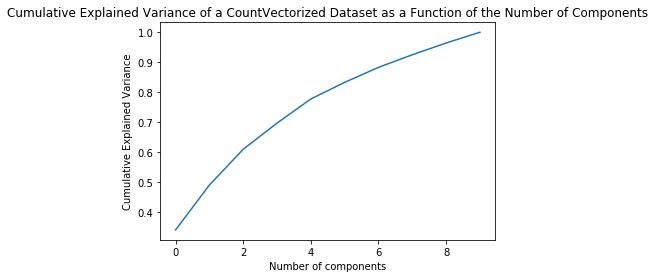

In [151]:
from sklearn.decomposition import PCA
pca = PCA().fit(count_vectorized_df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative Explained Variance of a CountVectorized Dataset as a Function of the Number of Components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained Variance');

How many components are needed to describe the data?
From the curve, approximately 90% of the total variance is contained within the first 6 components.
The first 4 components contain approximately 75% of the variance, while 9 components are needed to describe close to 100% of the variance.

For now, I will choose 2 components to avoid overfitting the data and to avoid long computational times. Let's visualize the CountVectorized data after running it through PCA:

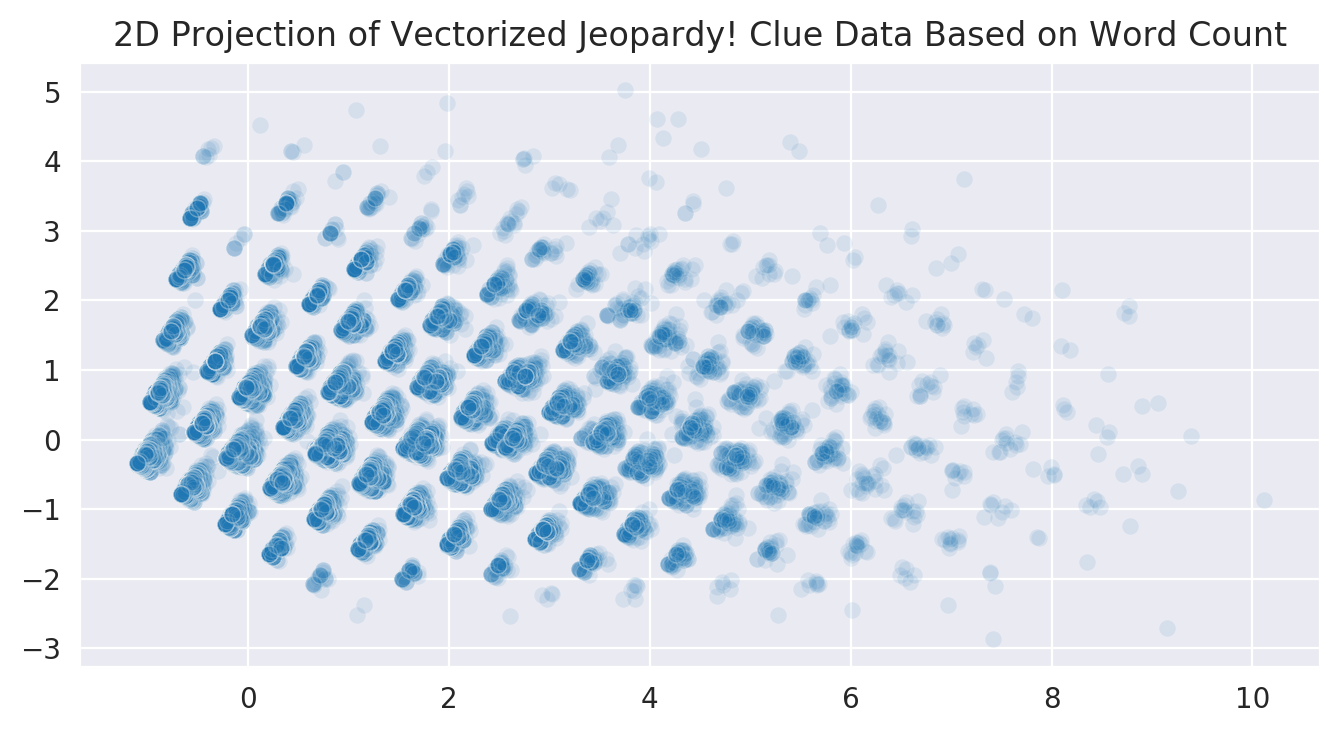

In [152]:
# Reduce dimensionality of count_vectorized_df before running it through KMeans, GMM, DBSCAN, and Agglomerative Clustering

pca = PCA(n_components=2).fit(count_vectorized_df) 
count_vectorized_2D = pca.transform(count_vectorized_df)

# Visualize 2D projection of the count_vectorized data
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(x=count_vectorized_2D[:,0], y=count_vectorized_2D[:,1], alpha=0.1)
  ax.set(title="2D Projection of Vectorized Jeopardy! Clue Data Based on Word Count") 


In [153]:
# Put PCA'd 2-D Representation Features into a DataFrame
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)
count_vectorized_2D_df

,0,1
0,-0.088756,0.614788
1,-1.096804,-0.353101
2,-0.898846,0.678139
3,-0.219336,-0.267519
4,-1.103358,-0.340949
...,...,...
389415,-0.892292,0.665987
389416,-0.014824,0.751568
389417,-0.114762,-0.107206
389418,2.225042,-0.521963


Before I consider running my CountVectorized 2D dataset through the different clustering models, let's also consider an alternative way of rescaling features: Term Frequency–Inverse Document Frequency (TF-IDF). This method gives a high weight to any term that appears often in a particular document, but not in many documents in the corpus - so if a word appears often in a particular document, but not in very many documents, it is likely to be very descriptive of the content of that document.

Let's see how different my dataset would look if I used TFIDF Vectorizer and PCA.
Because my comptuer cannot use all 389420 samples from the original dataset in the TfidfVectorizer, I randomly sample 5000 samples before fitting - even 10000/20000 samples were too large!

In [154]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
import random

# Randomly sample a dataset of 5000 clues from the original dataset
random_clues_sample = random.sample(list(clues_df["Processed Question"]), 5000)

# Discarding words in Scikit-Learn has a built-in list of English stopwords are too frequent to be informative
vec = TfidfVectorizer(stop_words = "english")
X = vec.fit_transform(random_clues_sample)
# Sparse matrix recording number of times each word appears

# Convert sparse matrix to a dense representation using toarray(), then convert it to a dataFrame and use 
# get_feature_names_out to get output feature names to be used as column names. 
tfidf_vectorized_df = pd.DataFrame(X.astype(np.uint8).toarray(), columns=vec.get_feature_names_out())
tfidf_vectorized_df

,000,000th,007,031,08,10,100,100th,10221,104,...,zog,zombie,zone,zoo,zoology,zoomin,zorro,zubrowka,zuni,zygote
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Again, I should reduce the dimensions of this matrix and keep only the most important features. Let's see how the 2D representation of this TFIDFVectorized data looks in comparison to the 2D representation of the CountVectorized data:

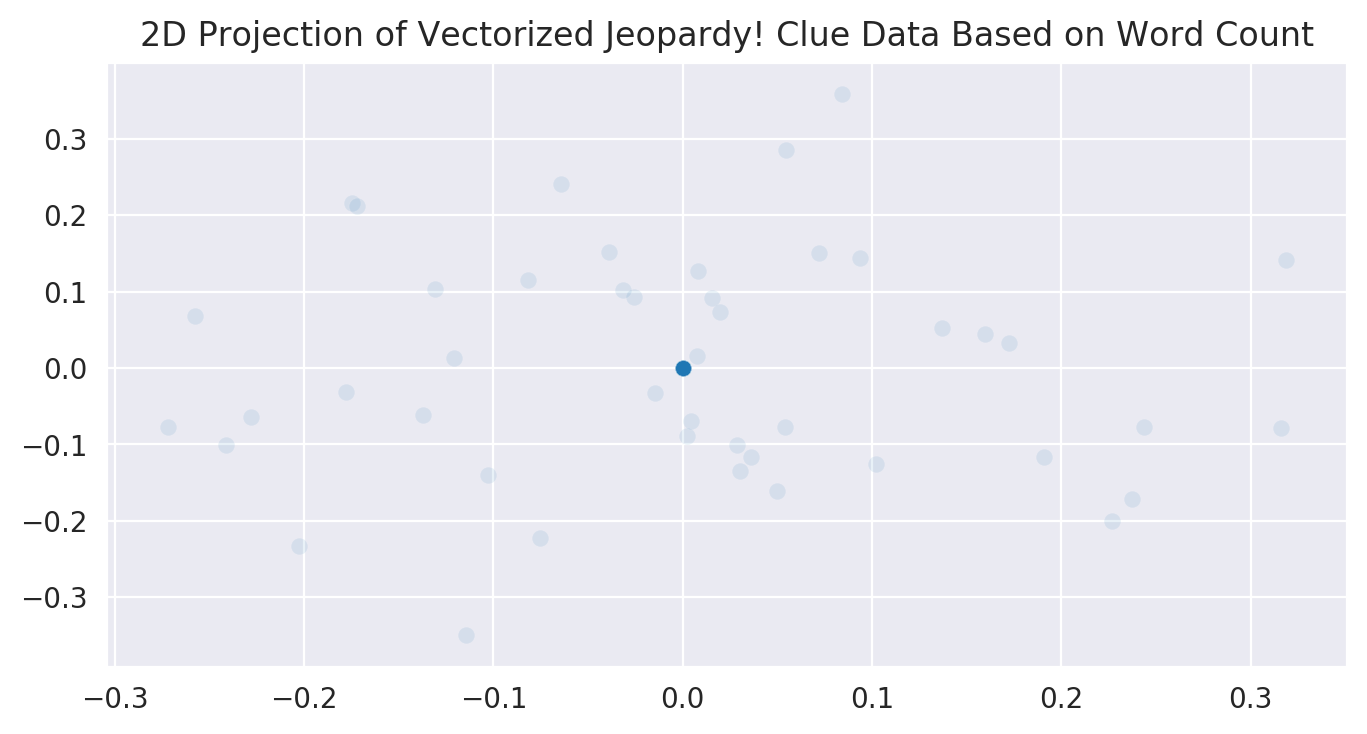

In [155]:
# Reduce dimensionality of tfidf_vectorized_df before running it through KMeans, GMM, DBSCAN, and Agglomerative Clustering

pca = PCA(n_components=2).fit(tfidf_vectorized_df) 
tfidf_vectorized_2D = pca.transform(tfidf_vectorized_df)

# Visualize 2D projection of the tfidf_vectorized data
plt.figure(figsize=(8, 4), dpi=200)
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(x=tfidf_vectorized_2D[:,0], y=tfidf_vectorized_2D[:,1], alpha=0.1)
  ax.set(title="2D Projection of Vectorized Jeopardy! Clue Data Based on Word Count")

Compared to the 2D representation of my CountVectorized data, this doesn't look good - most of the points appear to be concentrated in one spot, and there isn't a wide variance being shown. I would love to try this with more data samples, but I do not have enough memory to even do 10000 samples.

Therefore I will use the 2D CountVectorized data for my clustering. This is probably the better approach anyways, since I think the common words matter in this case and I am looking for words that are common in many documents, not just one like in TFIDF. 

### Step 4: Cluster CountVectorized Data - KMeans, Gaussian Mixture, and DBSCAN

### Step 4.1: KMeans

Let's start with KMeans clustering. How many clusters should I use? Let's try the Elbow Method with distortion/inertia values:

NOTE: The code block takes 5-10 minutes to load

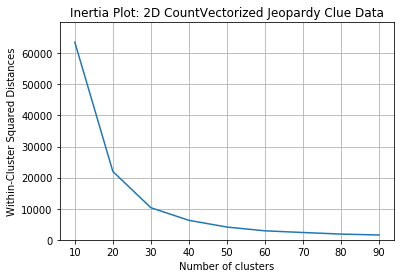

In [156]:
# How many clusters to use?
# Using the Elbow method: Find point with maximum curverature in the score plot.
from sklearn.cluster import KMeans

inertia = [] # Array for inertias to be plotted

# For each number of clusters from 10 to 100, produce a K-Means model and append the inertia to the interia array
for n_clusters in range(10, 100, 10):
    kmeans_model = KMeans(n_clusters=n_clusters, random_state=0).fit(count_vectorized_2D)
    inertia.append(kmeans_model.inertia_)
    
# Convert inertia array to a DataFrame
inertias = pd.DataFrame({'n_clusters': range(10, 100, 10), 'inertia': inertia})
# Plot Inertias
ax = inertias.plot(x='n_clusters', y='inertia')
plt.title("Inertia Plot: 2D CountVectorized Jeopardy Clue Data")
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
plt.grid(True)
ax.legend().set_visible(False)

Using the Elbow method means finding the point with the maximum curvature in the above plot. Since the curve decreases at a steadier pace from 30 clusters onwards, I will choose this number for my model.

In [158]:
# Train K-Means model
kmeans_model = KMeans(n_clusters=30, random_state=0)
kmeans_model.fit(count_vectorized_2D_df)
cluster_labels = kmeans_model.predict(count_vectorized_2D_df)

Let's grab the coordinates of our cluster centers and put them into a DataFrame:

In [159]:
cluster_centers = kmeans_model.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers)
cluster_centers_df

,0,1
0,-1.052345,-0.276093
1,0.767698,-0.119387
2,0.552042,1.171223
3,3.819093,-0.912409
4,-0.147430,-0.185782
5,-0.900733,0.645907
6,-0.035758,0.743504
7,0.290450,-0.612841
8,1.178670,-0.540425
9,2.658637,1.259353


Next, let's compare the coordinate of each data sample point in count_vectorized_2D_df and find the cluster (out of the 30 clusters created) that is closest to it.

The below segment of code is credited to https://medium.com/@williamsuh/unsupervised-learning-based-on-jeopardy-questions-part-2of-3-68c18c3490bd, who was able to find a way to compare each centroid center to each coordinate using the following formula:

NOTE: The following code block could take a while to run.

In [160]:
# Compare each coordinate with the closest centroid (out of the 30 created) and assign the index of closest centroid 
# to each coordinate using np.linalg.norm. 
count_vectorized_2D_df['Nearest Centroid'] = count_vectorized_2D_df.apply(
    lambda x: np.linalg.norm(cluster_centers_df.sub(x[[0,1]]), axis =1).argmin(), axis = 1)

In [161]:
count_vectorized_2D_df

,0,1,Nearest Centroid
0,-0.088756,0.614788,6
1,-1.096804,-0.353101,0
2,-0.898846,0.678139,5
3,-0.219336,-0.267519,4
4,-1.103358,-0.340949,0
...,...,...,...
389415,-0.892292,0.665987,5
389416,-0.014824,0.751568,6
389417,-0.114762,-0.107206,4
389418,2.225042,-0.521963,20


Let's now visualize all of the data samples in our count_vectorized_2D_df. The different colours correspond to each of the 30 different centroids (numbered from 0-29). The red 'X' markers correspond to the center of each cluster.

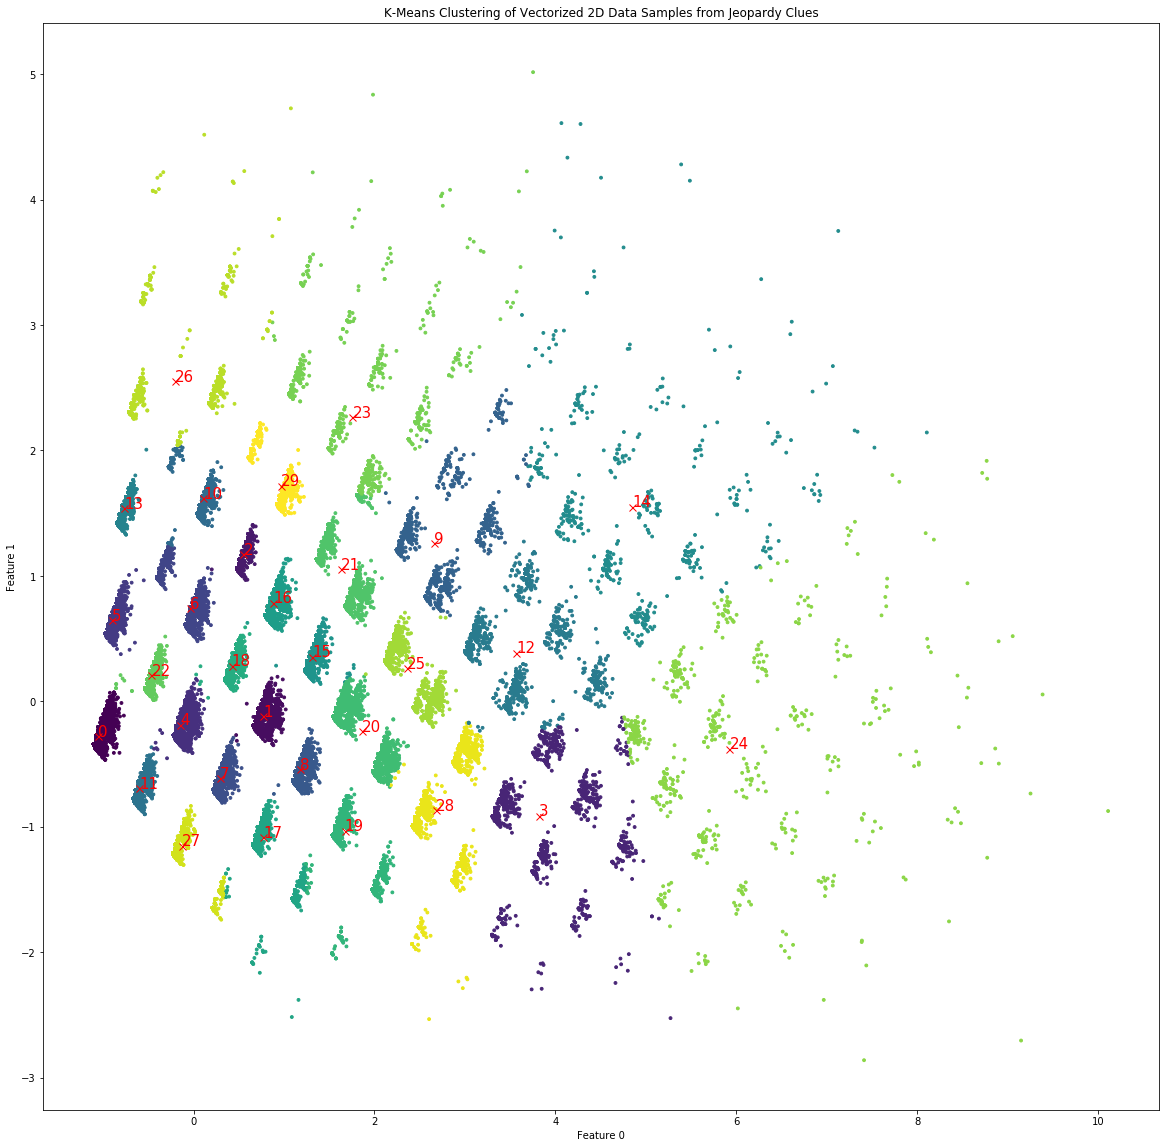

In [162]:
plt.figure(figsize=(20,20))
plt.title("K-Means Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

# Add a scatterplot with all of the data samples from count_vectorized_df.
plt.scatter(count_vectorized_2D_df[0], count_vectorized_2D_df[1], s=8, c=count_vectorized_2D_df['Nearest Centroid'])
# s is marker size
# c is the variable the colours should be catagorized by
    
# For each cluster in cluster_centers_df, grab the centroid coordinate and plot it with a red 'X'
for i in range(cluster_centers_df.shape[0]):
    centroid = kmeans_model.cluster_centers_[i]
    plt.plot(centroid[0], centroid[1], marker='x', markersize=7, color='red', 
             label=count_vectorized_2D_df['Nearest Centroid'])
    plt.annotate(str(i),centroid,size=15, color = 'red')


Visually, it doesn't look the model clustered the data too well - especially the outliers. K-means assumes the clusters are convex, and the data samples aren't necessarily arranged that way.

How effective was my model in clustering the dataset? Let's now look at some Validation Metrics  - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [56]:
# WARNING: THIS CELL TAKES A LONG TIME TO RUN
# from sklearn.metrics import silhouette_score

# kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
# silhouette_score(count_vectorized_2D, kmeans.labels_)

# Value: 0.7764321519607673

0.7764321519607673

A silhouette score of 0.776 is actually a pretty good score. A score of +1 indicates a highly dense clustering, so to be over 3/4ths of that metrics is a positive sign that my model peformed better than I thought.

In [163]:
from sklearn.metrics import calinski_harabasz_score

kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
calinski_harabasz_score(count_vectorized_2D, kmeans.labels_ )

755138.35299116

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - I will be able to gain more insight on whether this value of 75513.35 is good or bad once I get more Calinski-Harabasz scores from the other clustering models.

In [164]:
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=30, random_state=0).fit(count_vectorized_2D)
davies_bouldin_score(count_vectorized_2D, kmeans.labels_ )

0.5525369346651644

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares
the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 0.55 is fairly close to 0 - according to this, the clusters are not really similar and are better partitioned.

Let's randomly pick a cluster and manually check the questions in that cluster to see if there is any similarity between them:

In [167]:
# Manual Check - Randomly pick a centroid and grab the indices of all the data samples who are closest to that centroid
# Randomly pick centroid #15, for example
indices_of_samples_with_same_nearest_centroid = count_vectorized_2D_df[count_vectorized_2D_df['Nearest Centroid'] == 15].index
indices_of_samples_with_same_nearest_centroid

# For each index in the indices grabbed above, print out it's corresponding originalquestion in clues_df to see if there is 
# similarity between the questions
cluster_questions = []
cluster_categories = []
print('Clues that are closest to Cluster #15:\n')
for i in indices_of_samples_with_same_nearest_centroid:
    cluster_questions.append(clues_df['Question'][i])
    cluster_categories.append(clues_df['Category'][i])
    print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")
        

Clues that are closest to Cluster #15:

Clue:  "The only ""J"" in the Pledge of Allegiance" 	 Category:  "STARTS WITH ""J\""" 

Clue:  Celebration of the Jewish victory over the Syrians in 165 B.C. 	 Category:  HOLIDAYS 

Clue:  The number of laps run in the Indy 500 	 Category:  SPORTS 

Clue:  "\""Bubbles In The Wine"" was the appropriate title of his theme song" 	 Category:  TV TRIVIA 

Clue:  The Alamo is in the downtown of this city 	 Category:  U.S. CITIES 

Clue:  "Letter reversed in the name of what a giraffe calls ""The World's Biggest Toystore\""" 	 Category:  ALPHABET SOUP 

Clue:  "In this Kingston Trio song, Charley's doomed to ride it forever: ""Well, did he ever return? / No he never returned and his fate is still unlearned / He may ride forever 'neath the streets of Boston / And he's the man who never returned...\""" 	 Category:  TRANSPORTATION 

Clue:  The Atlanta Braves are in this division of the National League 	 Category:  BASEBALL 

Clue:  The most famous peak of 

Clue:  In Olympic springboard diving, the height of the board 	 Category:  SPORTS 

Clue:  In 1621 this Canadian province was named to honor the homeland of the reigning king, James 	 Category:  CANADA 

Clue:  As far as we know, it's the only city in the world with an 8 1/2-foot statue of Rocky Balboa 	 Category:  U.S.A. 

Clue:  1 of the 2 Americans who won gold in women's doubles at the '88 Olympics 	 Category:  TENNIS 

Clue:  In the Orient, the males of these insects are caged for their songs, this Buddy Holly group wasn't 	 Category:  INSECTS 

Clue:  "West Yellowstone, the ""Snowmobile Capital of the World"", is in this ""Treasure State\""" 	 Category:  POTPOURRI 

Clue:  May 16, 1929 in the Blossom Room of the Hollywood Roosevelt Hotel 	 Category:  HOORAY FOR HOLLYWOOD 

Clue:  In the U.S. it's the predominant architectural style of 1980s skyscrapers 	 Category:  DESIGN 

Clue:  The Tressy doll of the 1960s had a brass key in her back to rewind this 	 Category:  DOLLS 

Clue:  

Clue:  "When this Vice President was Grand Marshal of the Rose Parade in 1959, the theme was ""Tall Tales and True\""" 	 Category:  U.S. HISTORY 

Clue:  This lake in East Central Africa is the largest source of the Nile River 	 Category:  AFRICA 

Clue:  "In the late 1880s this engineer earned the nickname ""Magician of Iron\""" 	 Category:  FAMOUS NAMES 

Clue:  A rood screen, which separates the chancel from the nave, can be found in this type of building 	 Category:  DESIGN 

Clue:  To ease the burden of the Supreme Court, Congress established these courts in 1891 	 Category:  U.S. GOVERNMENT 

Clue:  "The ""chess"" type of this dessert is popular in the South" 	 Category:  COOKING 

Clue:  "A peach replaces the ""O"" in the name of this state on its license plates" 	 Category:  HODGEPODGE 

Clue:  "The ""trail blazing"" name of the first spacecraft to fly by Jupiter, in 1973" 	 Category:  JUPITER 

Clue:  "Ironically he died in 1673 while performing the title role of his ""The Ima

Clue:  In this 1934 classic, Alan Hale was the driver who stopped at the sight of Claudette Colbert's leg 	 Category:  "\""NIGHT"" MOVIES" 

Clue:  Hadrian's decision to build a shrine on the site of the temple in this city incited a Jewish revolt 	 Category:  ROMAN EMPERORS 

Clue:  "The pH in pH scale stands for the ""potential of "" this element" 	 Category:  SCIENCE 

Clue:  "Michael Corleone of ""The Godfather"" also appears in this author's novel ""The Sicilian\""" 	 Category:  FICTION 

Clue:  In 447 he & his band of Huns devastated the area between the Mediterranean & Black Seas 	 Category:  WORLD HISTORY 

Clue:  "Developed by the Dept. of Defense in the 1960s, millions now ""surf"" this information superhighway" 	 Category:  "\""NET""s" 

Clue:  In the 1948 convention of the States' Rights Party, Fielding Wright was selected as his running mate 	 Category:  JULY 

Clue:  In Africa it's the chief religion north of the Sahara 	 Category:  WORLD FACTS 

Clue:  "This astronaut wh

Clue:  "The bustle noted for this ""Jersey Lily"" collapsed when a lady sat down & sprang back when she stood up" 	 Category:  FOOLISH FASHION FADS 

Clue:  Once a carnival performer who bit off chickens' heads, it's slang for an odd or ridiculous person 	 Category:  OCCUPATIONS 

Clue:  "A fur used to line robes during the Middle Ages, or a ""Mrs."" played by Greer Garson" 	 Category:  ODD WORDS 

Clue:  "Bob Hoskins' father was a bookkeeper & Peter O'Toole's father had this ""racier"" profession" 	 Category:  "IT'S IN THE ""BOOK\""" 

Clue:  DDE 	 Category:  PRESIDENTS' MONOGRAMS 

Clue:  In his hard youth, this Oklahoman who fathered Arlo & the Folk Revival had a job washing spittoons 	 Category:  FOLKIES 

Clue:  "The dairy is ""de melwinkel"" while ""de kaaswinkel"" specializes in this kind of dairy product" 	 Category:  GOING DUTCH 

Clue:  This soft drink's secret formula is stored in a safe deposit box at the Trust Company of Georgia 	 Category:  FORMULAS 

Clue:  As a verb, th

KeyError: 81229

Upon first glance, the questions from this cluster don't look similar - the topics and official categories are quite varied. Any similarities found seem to be small ones. For example:

Clue:  Both Sun Valley & the Craters of the Moon are tourist attractions in this state 	 Category:  U.S. STATES 
Clue:  From name of Greek sun god, it is the 2nd most abundant element in the universe 	 Category:  SCIENCE 

These two clues have "sun" in them. This seems more like random coincidence though.

The word 'in' seems to be the most common keyword for most of these clues, and the answers seem to refer to something in a place or thing.

Let's look at the categories of all the questions in the cluster - I'm interested to see if most of the clues in this cluster have a common theme.

In [168]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
# Display top 20 categories in the cluster by count 
category_counts.head(20)

Number of Clues in Cluster: 1943
Number of Categories in Cluster: 1054


,Label,Count
0,HISTORY,24
1,WORLD HISTORY,19
2,SPORTS,16
3,WORLD GEOGRAPHY,15
4,MUSEUMS,14
5,U.S. HISTORY,14
6,LITERATURE,14
7,TRANSPORTATION,13
8,BOOKS & AUTHORS,12
9,U.S. CITIES,12


Out of the top categories in this cluster, history seems to be the most common - with History, World History, U.S. History, and American History, and Museums all appearing in the top 20. Geography is another common category, with World Geography, U.S. Cities, World Cities, World Capitals, U.S. States, Mountains all appearing in the top 20. Literature is also present in this cluster with Literature, Books & Authors, and Fictional Characters appearing in the top 20.

This makes sense when we consider the "in" keyword, as the clues appear to be talking about something that appears in a place, time, or setting. However keep in mind that there are 1054 categories, so the low numbers in the table above indicate that the  categories are quite varied and there isn't a category or topic that the cluster questions are heavily geared to.

To demonstrate this point, let's visualize the top 40 categories in the cluster in a pie/donut chart below - you'll see that it's quite varied. You can hover your mouse over each section in the pie/donut to get more details.

In [169]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #15 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Let's see if using a GaussianMixture Model is any better.

### Step 4.2: Gaussian Mixture Model


First, let's see how many components we'll need for our Gauusian Mixture model. Let's create an array of Gaussian Mixture models, each with a different number of components from 5 to 60:

NOTE: This cell may take a while to run

In [170]:
from sklearn.mixture import GaussianMixture

n_components = np.arange(5, 60, 5)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(count_vectorized_2D) for n in n_components]

Next, let's use some techniques in the Data Science Handbook to plot the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) for each Gaussian Mixture model in our array.

From Data Science Handbook Chapter 5: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

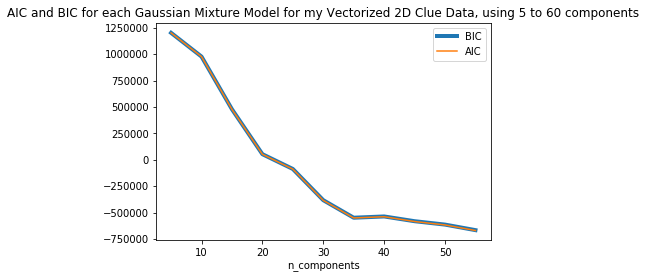

In [171]:
# First determine the right number of components to use for the model by plotting the Akaike information criterion (AIC) 
# and the Bayesian information criterion (BIC) for each GaussianMixture model with components from 5 to 60
plt.plot(n_components, [m.bic(count_vectorized_2D) for m in models], label='BIC', linewidth='4')
plt.plot(n_components, [m.aic(count_vectorized_2D) for m in models], label='AIC')
plt.legend(loc='best')
plt.title('AIC and BIC for each Gaussian Mixture Model for my Vectorized 2D Clue Data, using 5 to 60 components');
plt.xlabel('n_components');

Here, the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) plots for all the GaussianMixture models with components from 5 to 60 are the same. 

I will choose the number of components to be 35, since the optimal number of clusters is the value that minimizes the AIC or BIC line plots and the line plot seems to decline only slightly from this point on.

In [172]:
# Fit GaussianMixture model to data
gm_model = GaussianMixture(n_components=35, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)

In [173]:
# Check class probabilities for the input data points.
probs = gm_model.predict_proba(count_vectorized_2D)
print(probs.round(3))

[[0.    0.998 0.    ... 0.002 0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.999 ... 0.001 0.    0.   ]
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.    0.    1.   ]]


Let's add a cluster label column next to each data sample coordinate and call it labels_df:

In [174]:
labels_df = pd.DataFrame(count_vectorized_2D)
labels_df["Cluster Label"] = cluster_labels
labels_df

,0,1,Cluster Label
0,-0.088756,0.614788,1
1,-1.096804,-0.353101,4
2,-0.898846,0.678139,26
3,-0.219336,-0.267519,30
4,-1.103358,-0.340949,4
...,...,...,...
389415,-0.892292,0.665987,26
389416,-0.014824,0.751568,1
389417,-0.114762,-0.107206,2
389418,2.225042,-0.521963,3


The block of code is taken from Chapter 5 of the Data Science Handbook and will help me draw the Gaussian Mixture model.

In [175]:
# Functions to help draw ellipses and plot GaussianMixture model
# Code from Chapter 5 of the Data Science Handbook: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))

def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')

    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

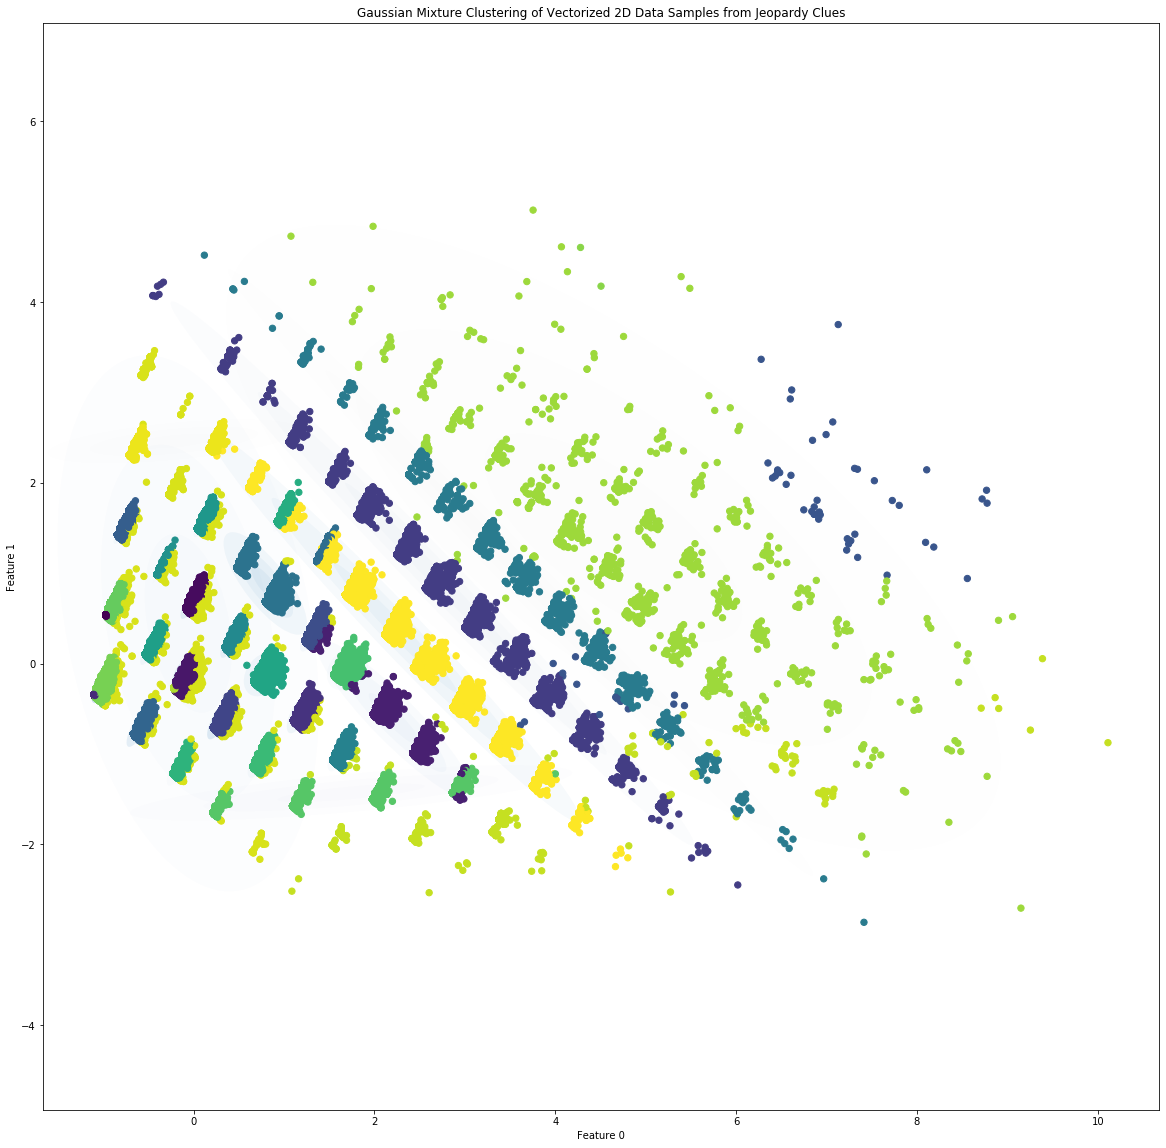

In [176]:
# Plot Gaussian Mixture Model
plt.figure(figsize=(20,20))
plt.title("Gaussian Mixture Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plot_gmm(gm_model, count_vectorized_2D)

Again, it doesn't look the model clustered the data too well - some clusters are overlapping with others.

How effective was my model in clustering the dataset compared to K-means? Let's now look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [127]:
# WARNING: THIS CELL TAKES A LONG TIME TO RUN
# from sklearn.metrics import silhouette_score

# gm_model = GaussianMixture(n_components=30, covariance_type='full', random_state=0)
# gm_model.fit(count_vectorized_2D)
# silhouette_score(count_vectorized_2D, cluster_labels)

0.624219212326926

A silhouette score of 0.624 is not as good as the K-Means score of 0.776, but is still a high-quality cluster since it is over 0.5.

In [177]:
from sklearn.metrics import calinski_harabasz_score

gm_model = GaussianMixture(n_components=35, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)
calinski_harabasz_score(count_vectorized_2D, cluster_labels)

195840.14585946628

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 75513.35 for the K-Means model, this value of 195840.15 is much, much, higher. This makes sense, as the clusters do seem more well defined and spaced apart compared to the K-Means clusters.

In [178]:
from sklearn.metrics import davies_bouldin_score

gm_model = GaussianMixture(n_components=35, covariance_type='full', random_state=0)
gm_model.fit(count_vectorized_2D)
cluster_labels = gm_model.predict(count_vectorized_2D)
davies_bouldin_score(count_vectorized_2D, cluster_labels)

1.4664661636616891

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 1.47 is not as close to 0 as the previous K-Means value of 0.55 - therefore, our clusters from Gaussian Mixture are more similar and are not partitioned as well as K-Means clusters.

Let's manually check the clues in a random cluster and see if this is true:

In [179]:
# Manual Check - Randomly pick a centroid and grab the indices of all the data samples who are closest to that centroid
# Randomly pick centroid #4, for example
indices_of_samples_with_same_cluster_label = labels_df[labels_df['Cluster Label'] == 4].index
indices_of_samples_with_same_cluster_label

# For each index in the indices grabbed above, print out it's corresponding question in clues_df to see if there is 
# similarity between the questions
cluster_questions = []
cluster_categories = []
print('Clues that are in Cluster #4:\n')
for i in indices_of_samples_with_same_cluster_label:
    cluster_questions.append(clues_df['Question'][i])
    cluster_categories.append(clues_df['Category'][i])
    print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")

Clues that are in Cluster #4:

Clue:  Scottish word for lake 	 Category:  LAKES & RIVERS 

Clue:  World's largest lake, nearly 5 times as big as Superior 	 Category:  LAKES & RIVERS 

Clue:  Marconi's wonderful wireless 	 Category:  INVENTIONS 

Clue:  Jewish crepe filled with cheese 	 Category:  FOREIGN CUISINE 

Clue:  "2 ""Saturday Night"" alumni who tried ""Trading Places\""" 	 Category:  ACTORS & ROLES 

Clue:  "His card read ""Have gun, will travel\""" 	 Category:  \'50'S TV 

Clue:  Name under which experimenter Don Herbert taught viewers all about science 	 Category:  \'50'S TV 

Clue:  "Site where John Hancock signed his ""John Hancock\""" 	 Category:  NATIONAL LANDMARKS 

Clue:  D.C. building shaken by November '83 bomb blast 	 Category:  NATIONAL LANDMARKS 

Clue:  Basketball defense or Serling's twilight area 	 Category:  4-LETTER WORDS 

Clue:  Until 1875 its dual capitals were New Haven & Hartford 	 Category:  STATE CAPITALS 

Clue:  "Derived from words ""American"", ""tr

Clue:  Male vocal range between a bass & a tenor 	 Category:  OPERA 

Clue:  Prominent Cent. European country not unified until 1871 	 Category:  HISTORY 

Clue:  Though closely related, they are generally larger & have longer ears than rabbits 	 Category:  MAMMALS 

Clue:  Wolves help maintain healthy herds among their prey by eliminating these 	 Category:  MAMMALS 

Clue:  "\""Moonshine\""" 	 Category:  "\""WHITE\""" 

Clue:  Disney film which featured Br'er Rabbit & Uncle Remus 	 Category:  DIRECTIONS 

Clue:  When something smells suspicious 	 Category:  ANIMAL ADJECTIVES 

Clue:  Something shabby, as though gnawed by rodents 	 Category:  ANIMAL ADJECTIVES 

Clue:  What you might feel after spilling wine all over your hostess' lamb chops 	 Category:  ANIMAL ADJECTIVES 

Clue:  Stubborn 	 Category:  ANIMAL ADJECTIVES 

Clue:  A vulpine synonym for sexy 	 Category:  ANIMAL ADJECTIVES 

Clue:  "A kiddie ""cocktail"" featuring grenadine syrup & a cherry, but not Bojangles" 	 Category: 

Clue:  Shy princess whose great-grandmother divorced Baron Fermoy for a real groom - a horse trainer 	 Category:  BRITISH ROYALTY 

Clue:  It's Italy's most popular spectator sport 	 Category:  SPORTS 

Clue:  Sam I Am served 'em with ham 	 Category:  "\""GREEN\""" 

Clue:  Betty Comden's songwriting & performing partner 	 Category:  "\""GREEN\""" 

Clue:  Heat, because you can catch cold 	 Category:  PUNCH LINES 

Clue:  After first backing Jay Traynor, they backed Jay Black 	 Category:  BACK-UP GROUPS 

Clue:  Elementary, my dear Watson! It's a 1939 movie starring Basil Rathbone & Nigel Bruce 	 Category:  "\""ADVENTURE"" MOVIES" 

Clue:  1948 film about a legendary lover played by legendary lover Errol Flynn 	 Category:  "\""ADVENTURE"" MOVIES" 

Clue:  "\""Mr. Smith"" & ""Billy Jack"" both went there" 	 Category:  FILM GEOGRAPHY 

Clue:  Sisters Ruth, Anita, June & once upon a time, Bonnie 	 Category:  FEMALE SINGERS 

Clue:  Card game, gun salute, or NYC restaurant 	 Category:  NUM

Clue:  Almost ale 	 Category:  RHYME TIME 

Clue:  A towering partition 	 Category:  RHYME TIME 

Clue:  Indefinitely frozen subsoil underlying polar regions 	 Category:  10-LETTER WORDS 

Clue:  St. Barbara watches over these souls at such places as San Quentin 	 Category:  PATRON SAINTS 

Clue:  Ben Franklin published it annually from 1733 through 1758 	 Category:  U.S. HISTORY 

Clue:  Jim Croce's title warning about Big Mr. Walker 	 Category:  NAMES IN SONG 

Clue:  "NFL ""Packers\""" 	 Category:  SPORTS CITIES 

Clue:  "MISL ""Lazers\""" 	 Category:  SPORTS CITIES 

Clue:  "NBA ""Mavericks\""" 	 Category:  SPORTS CITIES 

Clue:  "NHL ""Canucks\""" 	 Category:  SPORTS CITIES 

Clue:  "Famous people with unfamiliar faces urge you, ""Don't leave home without it\""" 	 Category:  CREDIT CARDS 

Clue:  JFK's sister, she married Peter Lawford 	 Category:  PRESIDENTIAL RELATIVES 

Clue:  No one would stick it under a chair except an uncouth mug 	 Category:  ANAGRAMS 

Clue:  Term for maxi

Clue:  Lukewarm as coffee that sat too long 	 Category:  "\""T"" TIME" 

Clue:  Keats wrote a whole poem about seeing these famous marbles 	 Category:  POETRY 

Clue:  Mythical half-human creature killed by Theseus 	 Category:  MORTAL MATTERS 

Clue:  Only U.S. state above 54deg 40' north 	 Category:  U.S. GEOGRAPHY 

Clue:  Constitutional term for bringing charges against a public official, not removing one from office 	 Category:  THE CONSTITUTION 

Clue:  "\""Uncle Tom's Cabin\""" 	 Category:  FIRST NOVELS 

Clue:  "\""Treasure Island\""" 	 Category:  FIRST NOVELS 

Clue:  "\""Wuthering Heights\""" 	 Category:  FIRST NOVELS 

Clue:  A wave that dashes into foam 	 Category:  "GIVE ME A ""BREAK\""" 

Clue:  Dawn 	 Category:  "GIVE ME A ""BREAK\""" 

Clue:  "He won a Pulitzer Prize for his short stories 2 years after he wrote ""Falconer\""" 	 Category:  LITERARY JOHNS 

Clue:  It means a frank conversation, not necessarily between cardiologists 	 Category:  CLICHES 

Clue:  "It's Calif

Clue:  LGA 	 Category:  AIRPORT DESIGNATIONS 

Clue:  PHX 	 Category:  AIRPORT DESIGNATIONS 

Clue:  DTW 	 Category:  AIRPORT DESIGNATIONS 

Clue:  "Singer ""Joanie"" Mitchell" 	 Category:  SPELL THAT NAME 

Clue:  "Late ""West Side Story"" star whose sister Lana wrote her biography" 	 Category:  CELEBRITY BOOKS 

Clue:  Equipment & goods that can be sold quickly for cash 	 Category:  "\""L.A.\""" 

Clue:  "They're described as ""Snowy, Flowy, Blowy, Showery, Flowery, Bowery, Hoppy, Croppy, Droppy, Breezy, Sneezy, Freezy\""" 	 Category:  POETRY 

Clue:  Henny Youngman's most famous 1-liner 	 Category:  "\""GIVE"" & ""TAKE\""" 

Clue:  It's about 26 miles long & averages 10 feet high 	 Category:  GERMANY 

Clue:  Singapore, Zanzibar, Morocco, Utopia, Bali & Hong Kong 	 Category:  MOVIE CLASSICS 

Clue:  "\""If I had Aladdin's lamp for only a day, I'd make a wish and here's what I'd say...\""" 	 Category:  TUNES OF THE '20s 

Clue:  Hear no evil,... Speak no evil 	 Category:  MISSING LIN

Clue:  Lachrymose droplets shed by certain large reptiles 	 Category:  IN OTHER WORDS... 

Clue:  Males rarely attempt amorous overtures when dealing with bespectacled females 	 Category:  IN OTHER WORDS... 

Clue:  He killed Hamlet's father by pouring poison into his ear 	 Category:  SHAKESPEARE 

Clue:  "Dutch artist who called his rigidly geometric style ""Neoplasticism\""" 	 Category:  ART 

Clue:  She married & divorced ex-child star Jackie Coogan & bandleader Harry James 	 Category:  FAMOUS COUPLES 

Clue:  Eating these onion relatives might keep you looking sleek 	 Category:  EDIBLE ANAGRAMS 

Clue:  "\""I am Heathcliff.\""" 	 Category:  NAME THE AUTHOR 

Clue:  Found around 900 B.C., it became a military state some 300 years later 	 Category:  ANCIENT GREECE 

Clue:  "Christian Rudolph Ebsen's ""friendly"" stage name" 	 Category:  A.K.A. 

Clue:  "Schumann called him ""a genius!""; George Sand probably had a few other names" 	 Category:  PIANISTS 

Clue:  These dual pianists me

Clue:  It broke out June 5, 1967 	 Category:  6 

Clue:  Nanny, kid or billy 	 Category:  4-LETTER WORDS 

Clue:  Homestake & other Black Hills mines have made it a leading gold-producing state 	 Category:  THE 50 STATES 

Clue:  Diplomats & kangaroos use these containers 	 Category:  CONTAINERS 

Clue:  A cylindrical metal container with a close-fitting lid, perfect for holding flour or sugar 	 Category:  CONTAINERS 

Clue:  It can contain astronauts or antihistamines 	 Category:  CONTAINERS 

Clue:  Crewelwork (10) 	 Category:  "CROSSWORD CLUES ""E\""" 

Clue:  "A ""bald"" chick (6)" 	 Category:  "CROSSWORD CLUES ""E\""" 

Clue:  A fragrance for all time (8) 	 Category:  "CROSSWORD CLUES ""E\""" 

Clue:  "A ""complex"" woman (7)" 	 Category:  "CROSSWORD CLUES ""E\""" 

Clue:  Gloria Steinem, Susan Strasberg & Norman Mailer have all written books about her 	 Category:  WOMEN 

Clue:  Standoffish 	 Category:  "ENDS WITH ""OOF\""" 

Clue:  It's also known as Sasquatch 	 Category:  "\""B

Clue:  Orange, Tipton, Tippecanoe 	 Category:  COUNTIES 

Clue:  "His people called him Mahatma, ""Great Soul"" & Bapu, ""Father\""" 	 Category:  20th CENTURY NAMES 

Clue:  "Strikes against these 2 ""generals"" ended March 13, 1946" 	 Category:  THE 20TH CENTURY 

Clue:  A football maneuver, or a common term for fishing gear 	 Category:  6-LETTER WORDS 

Clue:  A male goose, or a glance 	 Category:  6-LETTER WORDS 

Clue:  "It begins, ""'Christmas won't be Christmas without any presents', grumbled Jo...\""" 	 Category:  LITERATURE 

Clue:  English name for capelli d'angelo pasta 	 Category:  THE PASTA BAR 

Clue:  "\""Seasonal"" term for a pasta dish tossed or topped with sliced cooked vegetables" 	 Category:  THE PASTA BAR 

Clue:  "\""Carrie\""" 	 Category:  FIRST NOVELS 

Clue:  "\""Sister Carrie\""" 	 Category:  FIRST NOVELS 

Clue:  "\""Goodbye, Columbus\""" 	 Category:  FIRST NOVELS 

Clue:  His most important invention kept an elevator car from falling even if its cable broke 	


Clue:  "It specifically ""tries truth"" as well as generally ""tries all things\""" 	 Category:  LESSER-KNOWN PROVERBS 

Clue:  Commemorating a 1789 event, it didn't become a French national holiday until 1880 	 Category:  HOLIDAYS & OBSERVANCES 

Clue:  Scrumptious-sounding name for a popular yellow apple 	 Category:  COLORFUL FOOD 

Clue:  Gorgonzola & Stilton are classified as these 	 Category:  COLORFUL FOOD 

Clue:  It's Panama's official language 	 Category:  LANGUAGES 

Clue:  One Granny Smith within one 24-hour period prevents a medic's arrival 	 Category:  IN OTHER WORDS... 

Clue:  That man's pumping organ has a correct location 	 Category:  IN OTHER WORDS... 

Clue:  A single grasping appendage bathes your alternate grasping appendage 	 Category:  IN OTHER WORDS... 

Clue:  Inspect using one closely-spaced men's hair arranger 	 Category:  IN OTHER WORDS... 

Clue:  Explorers enjoy cave systems inside these ice masses because they constantly change 	 Category:  CAVING 

Clue

KeyError: 73930

Upon first glance, the questions from this cluster don't look similar - the topics and official categories are quite varied. Unlike the K-Means cluster I manually checked, the questions don't seem to have an obvious common keyword. 'By' may be a keyword that was used, which could indicates clues about things created by famous people. There does seem to be quite lot of names in this cluster.

Let's look at the categories of all the questions in the cluster - I'm interested to see if most of the clues in this cluster have a common theme.

In [180]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
category_counts.head(20)

Number of Clues in Cluster: 4290
Number of Categories in Cluster: 1635


,Label,Count
0,COMMON BONDS,99
1,RHYME TIME,77
2,IN OTHER WORDS...,43
3,"""CROSSWORD CLUES """"A\""""""",26
4,LAST NAME'S THE SAME,25
5,FOOD,24
6,POTENT POTABLES,23
7,SCIENCE,22
8,HOMOPHONIC PAIRS,22
9,3-LETTER WORDS,22


There seems to be a higher count of each category in this GMM cluster compared to the K-Means cluster!

Out of the top categories in this cluster, name-based categories like Common Bonds, Last Name's the Same, Composers, Authors, Maiden Names are all commonplace in the top 20 categories. There also seems be a lot of wordplay categories like Rhyme Time, In Other Words..., Crossword Clues, Homophonic Pairs, 3-Letter Words, Nursery Rhymes, 4-Letter Words, 5-Letter Words, and Crossword Clues "M" in this cluster.

Let's visualize the top 40 categories in the cluster in a pie/donut chart below - you'll still see that it's quite varied, but there seems to be more of a common theme present in this cluster compared to the K-Means cluster I looked at earlier. You can hover your mouse over each section in the pie/donut to get more details.

In [181]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #4 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Let's look at DBSCAN now.

### Step 4.3: DBSCAN

For DBSCAN, let's arbitraily choose an eps value of 0.1 and a min_samples value of 10 for this model. Because of memory and time constraints, let's choose 50000 random samples from our dataset for the model.

In [182]:
from sklearn.cluster import DBSCAN

# Create DataFrame from count_vectorized_2D
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)

# Create an NumPy representation of the DataFrame
count_vectorized_2D_array = count_vectorized_2D_df.values

# Array of 50000 random numbers that will represent the indices of the rows we'll grab for our random sample
random_row_num = np.random.randint(count_vectorized_2D_array.shape[0], size=50000)
# Create random sample from dataset
sample = count_vectorized_2D_array[random_row_num, :]
# Convert random sample to DataFrame
sample_df = pd.DataFrame(sample)
# Convert first and second columns of sample DataFrame to NumPy representation
sample_array = sample_df[[0,1]].values 

# Fit DBSCAN model to sample_array
db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)

# Add labels from the model as a column to the sample DataFrame
sample_df['Cluster Labels'] = db.labels_
sample_df.head(10)

,0,1,Cluster Labels
0,0.349184,0.179559,0
1,-0.927978,-0.186065,1
2,0.147433,1.623875,2
3,1.355666,0.433904,3
4,0.664687,-0.194090,4
5,0.360433,0.167568,0
6,-0.863510,0.701832,5
7,-0.436819,0.278595,6
8,-0.460906,0.242910,6
9,-1.092109,-0.352940,1


Let's now visualize this dataset:

Text(0, 0.5, 'Feature 1')

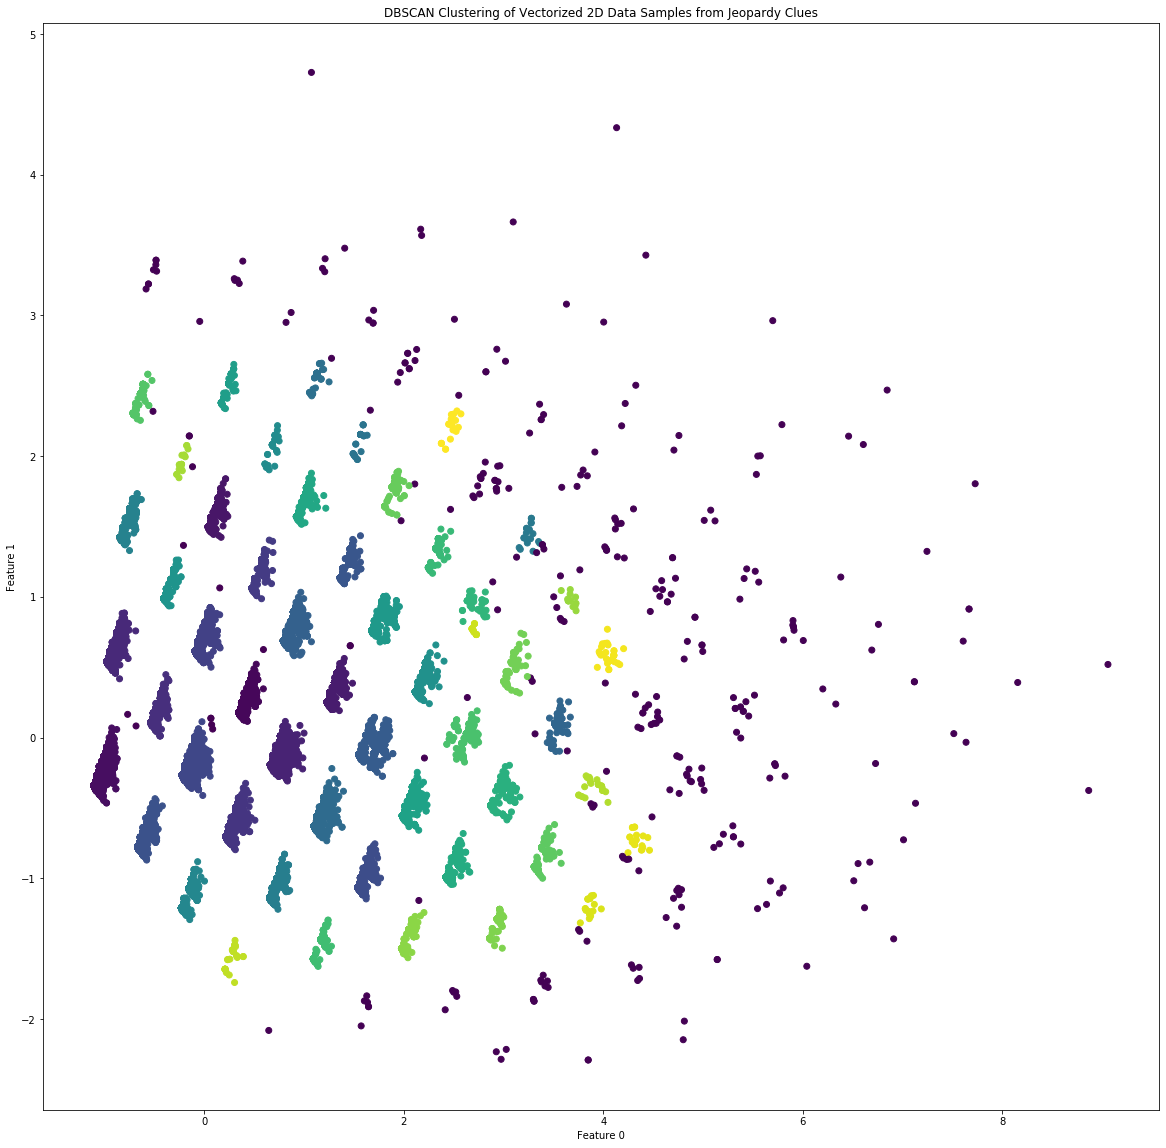

In [183]:
fig = plt.figure(figsize=(20,20))
plt.scatter(sample_df[0], sample_df[1], c = db.labels_)
plt.title("DBSCAN Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

It looks like the clusters are spaced apart nicely with minimal overlap, apart from the outliers. This probably had to do with the idea behind DBSCAN - that clusters form dense regions of data, separated by regions that are relatively empty.

How effective was my model in clustering the dataset compared to K-means and GMM? Let's now look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [184]:
from sklearn.metrics import silhouette_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
silhouette_score(sample_array, db.labels_)

0.8014029369855507

A silhouette score of 0.801 is a good score - slightly better than the K-Means score of 0.776 and significantly better than the GMM score of 0.624. It is important to keep in mind that this score was computed with only 5000 samples, as opposed to K-Means and GMM using the entire dataset. A score of +1 indicates a highly dense clustering, so to be about 4/5ths of that metric is a positive sign that my model peformed better than I thought.

In [185]:
from sklearn.metrics import calinski_harabasz_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
cluster_labels = db.fit_predict(sample_array) 
calinski_harabasz_score(sample_array, cluster_labels)

29160.070057721114

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 75513.35 for the K-Means model and a value of 195840.15 for GMM, the DBSCAN value of 109211.84 falls in the middle. This is slightly surprising, as the clusters from the visualization above seem to be more well-defined and space-apart with less overlap compared to the visualization in GMM.

In [186]:
from  sklearn.metrics import davies_bouldin_score

db = DBSCAN(eps=0.1, min_samples=10).fit(sample_array)
cluster_labels = db.fit_predict(sample_array) 
davies_bouldin_score(sample_array, cluster_labels)

1.4549854365893697

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 1.496 is about the same as the GMM value of 1.449. Both are not as close to 0 as the previous K-Means value of 0.55 - therefore, our clusters from DBSCAN are more similar and are not partitioned as well as K-Means clusters.

Let's manually check the clues in a random cluster and see if this is true:

In [200]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 10].index

cluster_questions = []
cluster_categories = []
print('Clues that are in Cluster #10:\n')

for i in indices_of_samples_with_same_label:
    cluster_questions.append(clues_df['Question'][i])
    cluster_categories.append(clues_df['Category'][i])
    print("Clue: ", clues_df['Question'][i], "\t", "Category: ", clues_df['Category'][i], "\n")

Clues that are in Cluster #10:

Clue:  "When ""Joshua Fit The Battle Of Jericho"", these took a tumble" 	 Category:  THE BIBLE 

Clue:  According to the Bible, it wasn't necessarily an apple 	 Category:  THE BIBLE 

Clue:  "His book, translated as ""My Struggle"", outlined plans to conquer Europe" 	 Category:  NOTORIOUS 

Clue:  Pulled the trigger or what's in a jigger 	 Category:  4-LETTER WORDS 

Clue:  Changing lines, you could have at one time ridden these from Freeport, IL to Utica, NY 	 Category:  TRANSPORTATION 

Clue:  His famed San Quentin concert inspired inmate Merle Haggard 	 Category:  COUNTRY MUSIC 

Clue:  Opposite of flow, tides do it 	 Category:  3-LETTER WORDS 

Clue:  "He'd build you a Model T ""in any color, so long as it was black\""" 	 Category:  AUTOMOBILES 

Clue:  In 1934, Gerald Ford was voted MVP of this school's football team 	 Category:  COLLEGES 

Clue:  Largest country entirely in Europe 	 Category:  GEOGRAPHY 

Clue:  "The 1st asked in this game is usual

Clue:  Because males of this Lucanidae species have jaws resembling deer antlers, they are called this 	 Category:  INSECTS 

Clue:  This state has consistently had the highest divorce rate, by far 	 Category:  LIFESTYLE, U.S.A. 

Clue:  "In Russian writing it appears as ""CCCP"", in English it's this" 	 Category:  RUSSIA 

Clue:  Tina Turner's #1 rhetorical question of 1984 	 Category:  MUSICAL QUESTIONS 

Clue:  For 11 weeks in 1959, Ray Charles asked this 	 Category:  MUSICAL QUESTIONS 

Clue:  In gymnastics, the long horse is the same as the pommel horse, but without these 	 Category:  SPORTS 

Clue:  Traveling food critic Duncan Hines lent his name to the 1st of these packaged desserts 	 Category:  FAMOUS DUNCANS 

Clue:  After 31 years of use, Swanson's is retiring this part of their TV dinners 	 Category:  BUSINESS & INDUSTRY 

Clue:  The American Red Cross has almost 20,000 paid staff members & 1 1/2 million of these 	 Category:  THE RED CROSS 

Clue:  In Muslim countries, it's


Clue:  Describes Mike Hammer or a 30-minute egg 	 Category:  "\""HARD\""" 

Clue:  Black locust, persimmon, & Osage orange, for example 	 Category:  "\""HARD\""" 

Clue:  Colors on the flag of Israel 	 Category:  ISRAEL 

Clue:  His 1281 goals are the most recorded for a pro soccer player 	 Category:  SPORTS RECORDS 

Clue:  Term for the person who operates the controls to set the trains on the right tracks 	 Category:  ODD JOBS 

Clue:  On TV, job of Ray K. Fenwick & William Preston 	 Category:  ODD JOBS 

Clue:  Cincinnati-based company that makes largest selling toothpaste, detergent, & dandruff shampoo in U.S. 	 Category:  BUSINESS BIGGIES 

Clue:  "The L.A. Times called this the ""sport of kings, queens & pawns\""" 	 Category:  BOARD GAMES 

Clue:  Shape of the windowed piece that players - or spirits - move around the Ouija board 	 Category:  BOARD GAMES 

Clue:  "Maybe ""Monkee"" business kept him away: he only joined the other Monkees once on their '86 tour" 	 Category:  SINGE

Clue:  In 1972 this country returned control of Okinawa to Japan 	 Category:  ASIAN HISTORY 

Clue:  "\""Hooray for"" this city, where you're terrific if you're even good" 	 Category:  GEOGRAPHICAL SONGS 

Clue:  "\""Ragtime Cowboy Joe"" was a ""high-falutin' scootin', shootin' son-of-a-gun from"" this state" 	 Category:  GEOGRAPHICAL SONGS 

Clue:  "Title of the following which Tom Cruise sang in ""Risky Business"" & Ron Reagan sang on ""Saturday Night Live"": ""Just take those old records off the shelf...\""" 	 Category:  "\""OLD"" & ""NEW\""" 

Clue:  "Warship that was called ""The Cheesebox on a Raft\""" 	 Category:  THE CIVIL WAR 

Clue:  In ASCII, this kind of computer code, A is 01000001 	 Category:  ODD ALPHABETS 

Clue:  In the sign-language alphabet, it's the first letter whose sign resembles it 	 Category:  ODD ALPHABETS 

Clue:  Distinction that makes a collection of maps an atlas 	 Category:  MAPS 

Clue:  Among particles in this family are the up, down, strange, and charm

Clue:  "Game show host Pierre LaCock, who starred on Broadway in ""La Cage aux Folles" 	 Category:  STAGE NAMES 

Clue:  "Homerian epic which could be subtitled ""Ulysses: The War Years\""" 	 Category:  ULYSSES 

Clue:  While the U.S. has the most telephones by far, this country is 2nd 	 Category:  COMMUNICATION 

Clue:  Her farmhouse in Kenya, now a museum, is in Karen, the Nairobi suburb named for her 	 Category:  MUSEUMS 

Clue:  "In ""A Day at the Races"", he told Margaret Dumont, ""Marry me, & I'll never look at any other horse!\""" 	 Category:  MOVIE CLASSICS 

Clue:  Ambergris, a substance formed in the intestines of sperm whales, is used in this beauty product 	 Category:  MAMMALS 

Clue:  Really a rodent, the jerboa looks like a tiny one of these 	 Category:  MAMMALS 

Clue:  If no candidate has a majority of electoral votes, this body selects the U.S. vice president 	 Category:  GOVERNMENT 

Clue:  The Bureau of Customs is part of this Cabinet department 	 Category:  GOVERNME

Clue:  "In Longfellow's poem, Paul Revere's ride took place ""on the 18th of"" this month, ""in '75\""" 	 Category:  POETRY 

Clue:  "Italian-American woman known as the ""Saint of the Immigrants\""" 	 Category:  SAINTS 

Clue:  "The maiden name of Julia Howe, who's famous for her ""hymn\""" 	 Category:  MAIDEN NAMES 

Clue:  Runner who married marathoner Ron Tabb & then discus thrower Richard Slaney 	 Category:  MAIDEN NAMES 

Clue:  "The last line of this fish story is ""The old man was dreaming about the lions.\""" 	 Category:  NOVELS 

Clue:  "Australian Morris West wrote ""The Devil's Advocate"" & this book about papal succession" 	 Category:  NOVELS 

Clue:  Technically, all thoroughbreds foaled during the calendar year are considered 1 year old on this date 	 Category:  HORSES 

Clue:  Number of main islands in the Greek group called the Dodecanese 	 Category:  WORLD GEOGRAPHY 

Clue:  They're found on basketball courts, tennis courts & softball diamonds 	 Category:  COMPOUND WO

Clue:  This traditional Austrian peasant costume consists of a blouse, a lace-up bodice & a full skirt with apron 	 Category:  AUSTRIA 

Clue:  According to Revelation 20:3, the devil will be chained & holiness will prevail on earth for this many yrs. 	 Category:  RELIGION 

Clue:  The forget-me-not isn't the state motto, it's this 	 Category:  ALASKA 

Clue:  "During the Renaissance these criminals were known as ""corsairs\""" 	 Category:  TRIVIA 

Clue:  Dumas' coughing courtesan Marguerite Gautier 	 Category:  WORLD LITERATURE 

Clue:  The king of Sweden 	 Category:  KINGS 

Clue:  Las Vegas, Nevada is located in this county named for a U.S. senator from Montana 	 Category:  COUNTIES 

Clue:  Type of sports venue at which the Third Estate swore they wouldn't disband until they had a constitution 	 Category:  THE FRENCH REVOLUTION 

Clue:  "\""By order summer lingers through"" this month ""in Camelot\""" 	 Category:  BROADWAY LYRICS 

Clue:  This adjective can precede lantern, red & 

Clue:  Severe torture to extract a confession, or, in masonic rites, a master mason 	 Category:  BY THE NUMBERS 

Clue:  After the Senate rejected Bork, Reagan nominated this man -- didn't work 	 Category:  1987 

Clue:  In May, 1987, 2 Iraqi missiles hit this U.S. Navy frigate 	 Category:  1987 

Clue:  The Greeks thought a man's body had 4 humors: phlegm, yellow bile, black bile & this fluid 	 Category:  MEDICAL HISTORY 

Clue:  Romany is known as the language of these nomadic people 	 Category:  "STARTS WITH ""G\""" 

Clue:  "Half of the Psalms are attributed to this king whose name means ""Beloved (Of God)\""" 	 Category:  THE BIBLE 

Clue:  This gospel writer was a tax collector at Capernaum when Jesus 1st met him 	 Category:  THE BIBLE 

Clue:  In Hopi Indian snake dances, priests carry these snakes in their mouths 	 Category:  SNAKES 

Clue:  "He played sheriff Sam Cade in the early 1970s drama ""Cade's County\""" 	 Category:  TELEVISION 

Clue:  The Ambassador Bridge, world's l

Clue:  Sea otters eat while floating in this position 	 Category:  SEA LIFE 

Clue:  The shell of the quahog variety of this bivalve was used as wampum by the Indians 	 Category:  SEA LIFE 

Clue:  Fishermen in the Orient put rings around the necks of these birds so they won't swallow the fish they catch 	 Category:  SEA LIFE 

Clue:  This painter's landscapes drew compliments at a Manet exhibition, much to the chagrin of Manet 	 Category:  ART 

Clue:  Harry Bailly, host of the Tabard Inn, serves as the M.C. in this collection of stories 	 Category:  FICTIONAL CHARACTERS 

Clue:  This city was incorporated May 3, 1802, its mayor to be appointed by the president 	 Category:  AMERICAN HISTORY 

Clue:  The William Tell Overture contains a ranz de vache, a Swiss alphorn melody used to call these 	 Category:  MUSIC 

Clue:  Before becoming an apostle, Peter was engaged in this profession 	 Category:  THE BIBLE 

Clue:  For 43 years Nebuchadnezzar ruled his empire from this city on the Euph

Clue:  Ohio's state beverage is this, the juice that looks like V-8 	 Category:  OHIO 

Clue:  Usually, a prelude is an introduction to a fugue & this is one to an opera 	 Category:  MUSIC 

Clue:  This symbol is usually used to mark the end of a composition 	 Category:  MUSIC 

Clue:  "This black poetess won a Pulitzer for ""Annie Allen"" & became Illinois' poet laureate in 1969" 	 Category:  POETS 

Clue:  "This couturier featured long, full skirts in his ""New Look"" of 1947" 	 Category:  FASHION DESIGNERS 

Clue:  "This Egyptian president was called ""Nasser's Poodle"" before succeeding him" 	 Category:  NICKNAMES 

Clue:  "General Joe Stilwell disdainfully called this generalissimo ""Peanut\""" 	 Category:  NICKNAMES 

Clue:  "\""Current Biography"" claims Quayle's car once sported ""AuH2O"" plates, boosting this candidate" 	 Category:  DAN QUAYLE 

Clue:  "A fairway laid out at an angle is given this ""canine"" name" 	 Category:  GOLF 

Clue:  It's the longest bone in the arm 	 C

Clue:  Also called puffers, these fish are known for their ability to inflate themselves 	 Category:  ZOOLOGY 

Clue:  These apes who live on the Rock of Gibraltar are tailless monkeys, not true apes 	 Category:  ZOOLOGY 

Clue:  "Physically sound & healthy, or what a temperamental child might ""throw\""" 	 Category:  3-LETTER WORDS 

Clue:  The box variety of this reptile can live in your backward & can learn to come to you for its food 	 Category:  PETS 

Clue:  "\""Profiles in Courage"" won JFK the 1957 Pulitzer Prize in this category" 	 Category:  PRESIDENTS 

Clue:  "One of his 1856 slogans was ""Buck and Breck""; Breck was John Breckinridge" 	 Category:  PRESIDENTS 

Clue:  To get the best beaten egg whites, use a balloon whisk & a bowl made out of this metal 	 Category:  COOKING 

Clue:  "In the proverb, it's what a ""stitch in time"" does" 	 Category:  "\""SAVE\""" 

Clue:  The inner core of the Earth is thought to be a solid ball composed mainly of nickel & this metal 	 Catego

Clue:  "Luxembourg's is ""Uns Heimat"", which means ""Our Homeland\""" 	 Category:  AROUND THE WORLD 

Clue:  "The name of this artistic composition of materials pasted to a surface comes from the Greek ""kolla\""" 	 Category:  CRAFTS 

Clue:  Estimates of when these people abandoned the city of Uxmal range from 600 to 1,000 years ago 	 Category:  HISTORY 

Clue:  In 1935 the Saar territory was reunited with this country 	 Category:  HISTORY 



The questions from this cluster don't look similar - the topics and official categories are quite varied. The questions don't seem to have an obvious common keyword. The only thing I could possibly say are similar are the length of the questions - they seem shorter, direct, and to-the-point.

Let's look at the categories of all the questions in the cluster - Again, I'm interested to see if most of the clues in this cluster have a common theme.

In [201]:
# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")
category_counts.head(20)

Number of Clues in Cluster: 5142
Number of Categories in Cluster: 1940


,Label,Count
0,SPORTS,41
1,SCIENCE,38
2,HISTORY,35
3,ART,32
4,WORLD HISTORY,31
5,ANIMALS,31
6,FOOD,29
7,THE BIBLE,28
8,ZOOLOGY,27
9,U.S. CITIES,25


Sports is the top category in this cluster, but with only 41 clues out of 5142. The categories are pretty varied here, and do not lean to a specific category.

Let's visualize the top 40 categories in the cluster in a pie/donut chart below - as expected, it's quite varied, and doesn't seem to lean to a specific category. You can hover your mouse over each section in the pie/donut to get more details.

In [203]:
fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #10 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Overall, the results for the DBSCAN model are worse than those of K-Means and Gaussian Mixture Model.

Given extra time and resources, I would perform a grid search to determine to best parameters to use, and use a more powerful computer in order to fit a DBSCAN model to the entire dataset.

Let's move on to Agglomerative Clustering.

### Step 4.4: Agglomerative Clustering

For Agglomerative Clustering, let's use 30000 samples for time and memory purposes. 
First, we'll have to use a Dendrogram to help decide how many clusters to use.

NOTE: For the results of the cell below, scroll to the very bottom to see the dendrogram.

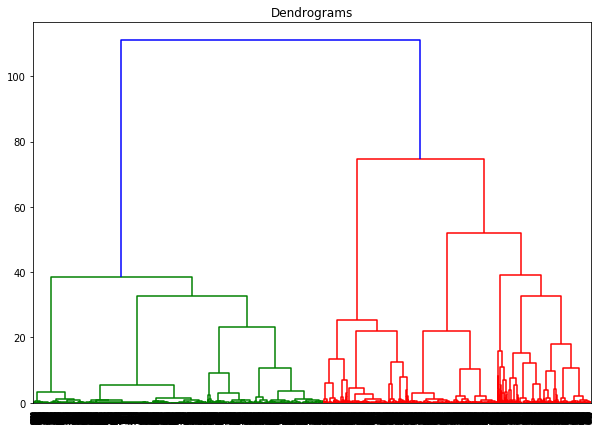

In [204]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Create DataFrame from count_vectorized_2D
count_vectorized_2D_df = pd.DataFrame(count_vectorized_2D)

# Create an NumPy representation of the DataFrame
count_vectorized_2D_array = count_vectorized_2D_df.values

# Array of 10000 random numbers that will represent the indices of the rows we'll grab for our random sample
random_row_num = np.random.randint(count_vectorized_2D_array.shape[0], size=10000)
# Create random sample from dataset
sample = count_vectorized_2D_array[random_row_num, :]
# Convert random sample to DataFrame
sample_df = pd.DataFrame(sample)

# Create Linkage Array using the default ward linkage type and euclidean distance metric
linkage_array = linkage(sample_df, metric='euclidean', method='ward')

# Plot the dendrogram for the linkage_array containing the distances between clusters

plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage_array)

To determine the number of clusters to use, we imagine a horizontal line (the dashed line below) cutting across the section with the largest vertical lines in the dendrogram above - that is the section with the blue lines. The number of vertical lines that this dashed line intersects is the number of clusters.

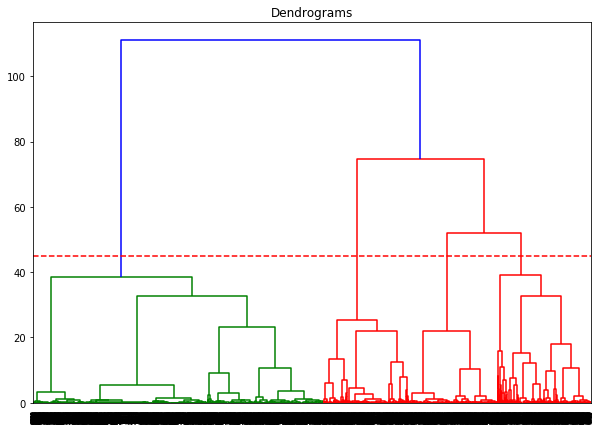

In [206]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = dendrogram(linkage_array)
plt.axhline(y=45, color='r', linestyle='--')

The horizontal dashed line intersects 4 vertical lines, so we'll use 4 clusters.

In [207]:
agg = AgglomerativeClustering(n_clusters=4)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)

# Add labels from the model as a column to the sample DataFrame
sample_df['Cluster Labels'] = agg.labels_
sample_df.head(10)

,0,1,Cluster Labels
0,-1.103358,-0.340949,1
1,0.079103,1.553222,2
2,0.236407,-0.726892,3
3,1.200645,-0.456854,0
4,2.102554,-1.259194,0
5,-0.591486,-0.639398,1
6,-0.022644,0.609199,2
7,-0.874759,0.713824,1
8,1.475238,0.224671,0
9,-0.434876,0.311027,1


Text(0, 0.5, 'Feature 1')

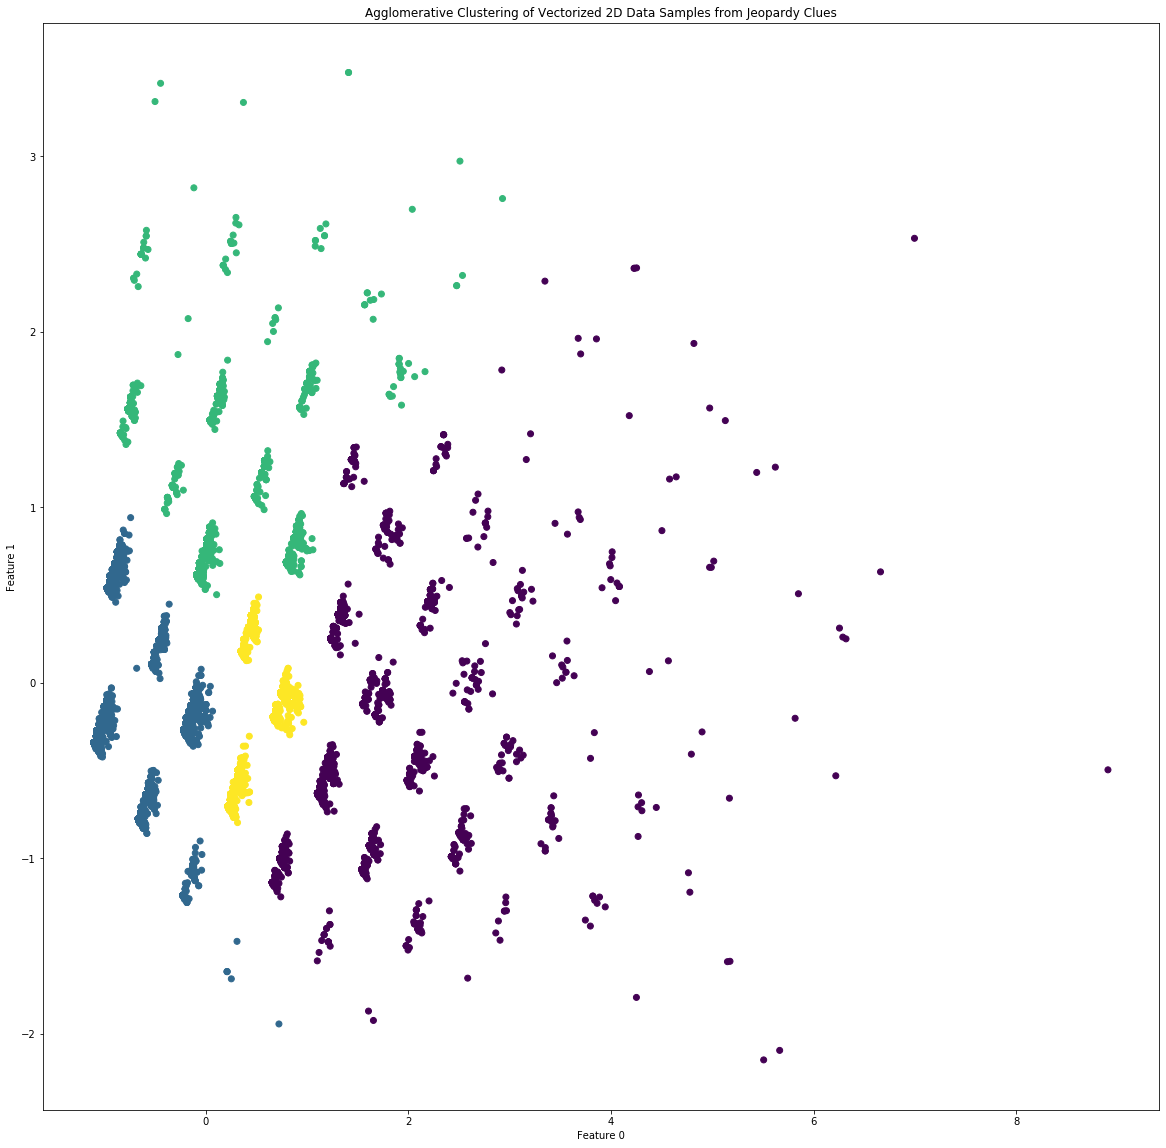

In [208]:
fig = plt.figure(figsize=(20,20))
plt.scatter(sample_df[0], sample_df[1], c = agg.labels_)
plt.title("Agglomerative Clustering of Vectorized 2D Data Samples from Jeopardy Clues")
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')

With only four clusters it will be interesting to see contents of each one.

How effective was my model in clustering the dataset compared to K-means, GMM, and DBSCAN? Let's look at some Validation Metrics - namely the Silhouette Score, Calinski-Harabasz Score, and Davies-Bouldin Index:

In [209]:
from sklearn.metrics import silhouette_score

agg = AgglomerativeClustering(n_clusters=4)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
silhouette_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.6120863956452477

A silhouette score of 0.612 is significantly less than the K-Means score of 0.776 and the DBSCAN score of 0.801, while being closer to the GMM score of 0.624. It is important to keep in mind that this score was computed with only 10000 samples, as opposed to K-Means and GMM using the entire dataset. A score of +1 indicates a highly dense clustering, so to be only just half of that score indicates to me that the model produced slightly above-average results.


In [210]:
from sklearn.metrics import calinski_harabasz_score

agg = AgglomerativeClustering(n_clusters=4)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
calinski_harabasz_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



12512.790316977065

The Calinski-Harabasz score is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters. A higher Calinski-Harabasz index relates to a model with better defined clusters - compared to the value of 75513.35 for the K-Means model, the value of 195840.15 for GMM, and the DBSCAN value of 109211.84, the score of 12512.79 is significantly less than all of these scores. This is not surprising, as building only four overlapping clusters means these clusters likely won't be particularly well-defined.


In [211]:
from  sklearn.metrics import davies_bouldin_score

agg = AgglomerativeClustering(n_clusters=4)
# Fit Agglomerative model to sample_df
agg.fit_predict(sample_df)
davies_bouldin_score(sample_df, agg.labels_)

C:\Users\milec\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



0.6218228985548052

The Davies-Bouldin index signifies the average ‘similarity’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters.

0 is the lowest possible score, and values closer to zero indicate a better partition.

Based off that, our value of 0.622 falls between the DBSCAN value of 1.496, GMM value of 1.449 and the K-Means value of 0.55 - therefore, our clusters from Agglomerative clustering are more similar compared to K-means clusters, but are still better partitioned compared to DBSCAN and GMM.

Manually checking questions in each cluster seems pointless when there are only four clusters, so let's go straight to visualizing the top 40 categories for two of the clusters in a pie/donut charts below. You can hover your mouse over each section in the pie/donut to get more details.

In [212]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 0].index

cluster_questions = []
cluster_categories = []
print('Cluster #0:\n')

for i in indices_of_samples_with_same_label:
    cluster_questions.append(clues_df['Question'][i])
    cluster_categories.append(clues_df['Category'][i])

# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")

fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #0 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Cluster #0:

Number of Clues in Cluster: 1677
Number of Categories in Cluster: 776


In [216]:
indices_of_samples_with_same_label = sample_df[sample_df['Cluster Labels'] == 1].index

cluster_questions = []
cluster_categories = []
print('Cluster #1:\n')

for i in indices_of_samples_with_same_label:
    cluster_questions.append(clues_df['Question'][i])
    cluster_categories.append(clues_df['Category'][i])

# Create a dictionary containing the questions in the cluster and their categories 
cluster_dict = {"Question": [], "Category": []}
cluster_dict["Question"] = cluster_questions
cluster_dict["Category"] = cluster_categories

# Convert dictionary to a DataFrame
cluster_df = pd.DataFrame(cluster_dict)
# Get the number of questions for each category in the cluster
category_counts = cluster_df["Category"].value_counts()
# Convert the counts to a DataFrame
category_counts = category_counts.to_frame()
# Relabel columns before printing
category_counts = category_counts.rename_axis('Label').reset_index()
category_counts.rename(columns = {'Category':'Count'}, inplace = True)
# Print number of total clues and categories in this cluster
print(f"Number of Clues in Cluster: {cluster_df.shape[0]}")
print(f"Number of Categories in Cluster: {category_counts.shape[0]}")

fig = px.pie(category_counts[0:40], values='Count', names='Label', title='Clues in Cluster #1 - Grouped by Category', hole=0.6)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

Cluster #1:

Number of Clues in Cluster: 5209
Number of Categories in Cluster: 1139


The two clusters appear to be fairly similar with how varied their categories are - Sports and Science are the leading categories for both clusters, but not by much. There seems to be a little bit of everything in each cluster, and there isn't much distinguishing the two.

### Step 5: Results - Summary, Interpretation, and Reflection

### Summary and Interpretation

To recap, we have the following validation metrics for each model:
- Our K-Means model produced a silhouette score of 0.776, a Calinski-Harabasz score of 75513.35, and a Davies-Bouldin index of 0.552.
- Our Gaussian Mixture model produced a silhouette score of 0.624, a Calinski-Harabasz score of 195840.15, and a Davies-Bouldin index of 1.449.
- Our DBSCAN model produced a silhouette score of 0.801, a Calinski-Harabasz score of 109211.84, and a Davies-Bouldin index of 1.496.
- Our Agglomerative model produced a silhouette score of 0.612, a Calinski-Harabasz score of 12512.79, and a Davies-Bouldin index of 0.622.

Overall, our K-Means model has the best validation matrics - the silhouette score indicates highly dense clustering and is excellent, especially considering that I am using the entire dataset. The Calinski-Harabasz score is decent (ranked 3rd after those of the Gaussian Mixture model and DBSCAN and K-Means also has the best Davies-Bouldin index (closest to 0) which indicattes a better partition and less similarity compared to the other models. From manually checking a cluster, it is encouraging that the cluster had questions on various types of history, geography and literature but the categories were still wuite varied.

Our Gaussian Mixture model produced one of the lowest silhouette scores, but at 0.624 it is still a quality cluster since it is over 0.5, especially considering that the entire dataset is being used. The model had the best Calinski-Harabasz score by far, indicating that the model has better defined clusters compared to the rest. The Davies-Bouldin index was one of the lowest though, indicating that the clusters are somewhat similar. From manually checking a cluster, there seems to be a higher count of each category in the GMM cluster compared to the K-Means cluster. I was glad to see that the category was mostly based off name-based and wordplay categories. Although the validation metrics were not the best, this model probably produced the best results for the manual check.

The DBSCAN model produced the best silhouette score at 0.801, the second-best Calinski-Harabasz score at 109211.84, and the worst Davies-Bouldin score of 1.449. Keep in mind that these results were produced with a sample of 50000 questions instead of the full dataset, due to time and memory contraints. Manually, the questions from the cluster I checked did not look similar - the topics and official categories are quite varied. The only thing I could possibly say are similar are the length of the questions - they seem shorter, direct, and to-the-point. The manual check of the DBSCAN cluster did not really match the validation metrics results that were produced.

Finally, the Agglomerative model produced the worst results overall (despite only having a sample of 10000) as it had the worst silhouette score at 0.612 (but still a good number since it is over 0.5), the worst Calinski-Harabasz score by far at only 12512.79, and a decent Davies-Bouldin index at 0.622. Also, the two clusters I checked looked quite similar - both were quite varied as Sports and Science are the leading categories for both clusters, but not by much. There seems to be a little bit of everything in each cluster, and there wasn't much distinguishing the two.

Using these results, let's interpret my original question from my prject proposal: Using the clustering models learned in ENSF 611, experiment and explore how effective each of them are in clustering clues from the game show Jeopardy! based on the keywords used in each clue.

Answer: Although none of the models produced particularly amazing results, I would say the K-Means model and Gaussian Mixture models produced the best results overall based off their validation metrics and manual checks that I talked about above. I am curious if it is possible that DBSCAN and Aggomerative could produce better results, given a larger sample.

### Reflection

Why Did I Select This Problem to Solve?

I wanted to explore if I could cluster clues from the game show Jeopardy! based off their keywords, instead of relying solely on the clue category to determine which topics appear the most frequently in clues. I wondered if separating clues based on the words would be more reliable for finding distinct clue topics than relying on just category names, which have become more cryptic as time has passed. This was also an experimental project for my own curiosity, to see first-hand how effeective the clustering models I learned in class can be with clustering real-world data.

Deviations from my Proposal?
- Instead of using three versions of the clues CSV file (all clues from 1984-2021, clues from 1984-1995, and clues from 2010-2021) I just used the original version with all clues from 1984-2021 due to time constraints. The code I wrote in this file had become quite long and I didn't want to repeat it for two other datasets.
- As I mentioned, the code in this notebook file had become quite long - much longer than I expected. For these reasons I did not explore other clustering models like spectral clustering or Doc2Vec like I planned - these are bonus tasks I can revisit in the future.
- I did not expect to manually check questions and categories from random clusters for each model and visualize them in a pie/donut chart, but thought it was a great idea instead of just looking at validation metrics.

Project Difficulties and What I Learned?

The most difficult parts of this project included finding the appropriate parameters to use for each model - I learned about using the Elbow method to find the appropiate amount of clusters for K-Means model, plotting the Akaike information criterion (AIC) and the Bayesian information criterion (BIC) to find the appropiate amount of components for the Gaussian Mixture model, and using a Dendrogram to find the appropiate amount of clusters for Agglomerative model. It was also difficult figuring out a way to compare each centroid center from the K-Means model to each data sample, and needed to search code written by someone (https://medium.com/@williamsuh/unsupervised-learning-based-on-jeopardy-questions-part-2of-3-68c18c3490bd) who had already done it. A lack of memory was also an issue, as training models and computing silhouette scores took a long time. For DBSCAN and Agglomerative clustering, I had to use a small sample size because there wasn't enough memory to fit the entire dataset. 

Given extra time and resources, I would also perform a grid search to determine to best parameters to use, especially for DBSCAN. I would also use a more powerful computer or parallel computing in order to fit the DBSCAN and Agglomerative models to the entire dataset.

This is my first time doing a machine learning project, and I really enjoyed being able to apply the concepts I learned in class to real-world data, regardless of the results. The easiest and most enjoyable parts of this project were the data exploration, data cleaning, and data visualization aspects.